In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

<Axes: xlabel='target', ylabel='count'>

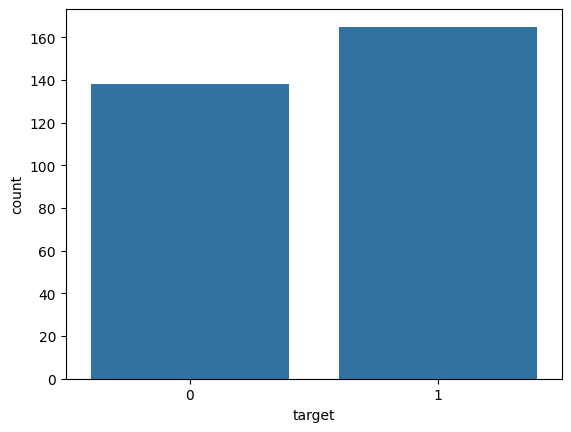

In [4]:
sns.countplot(data = df , x = "target") 

In [5]:
X = df.drop("target" , axis = 1)

In [6]:
y = df["target"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.shape

(203, 13)

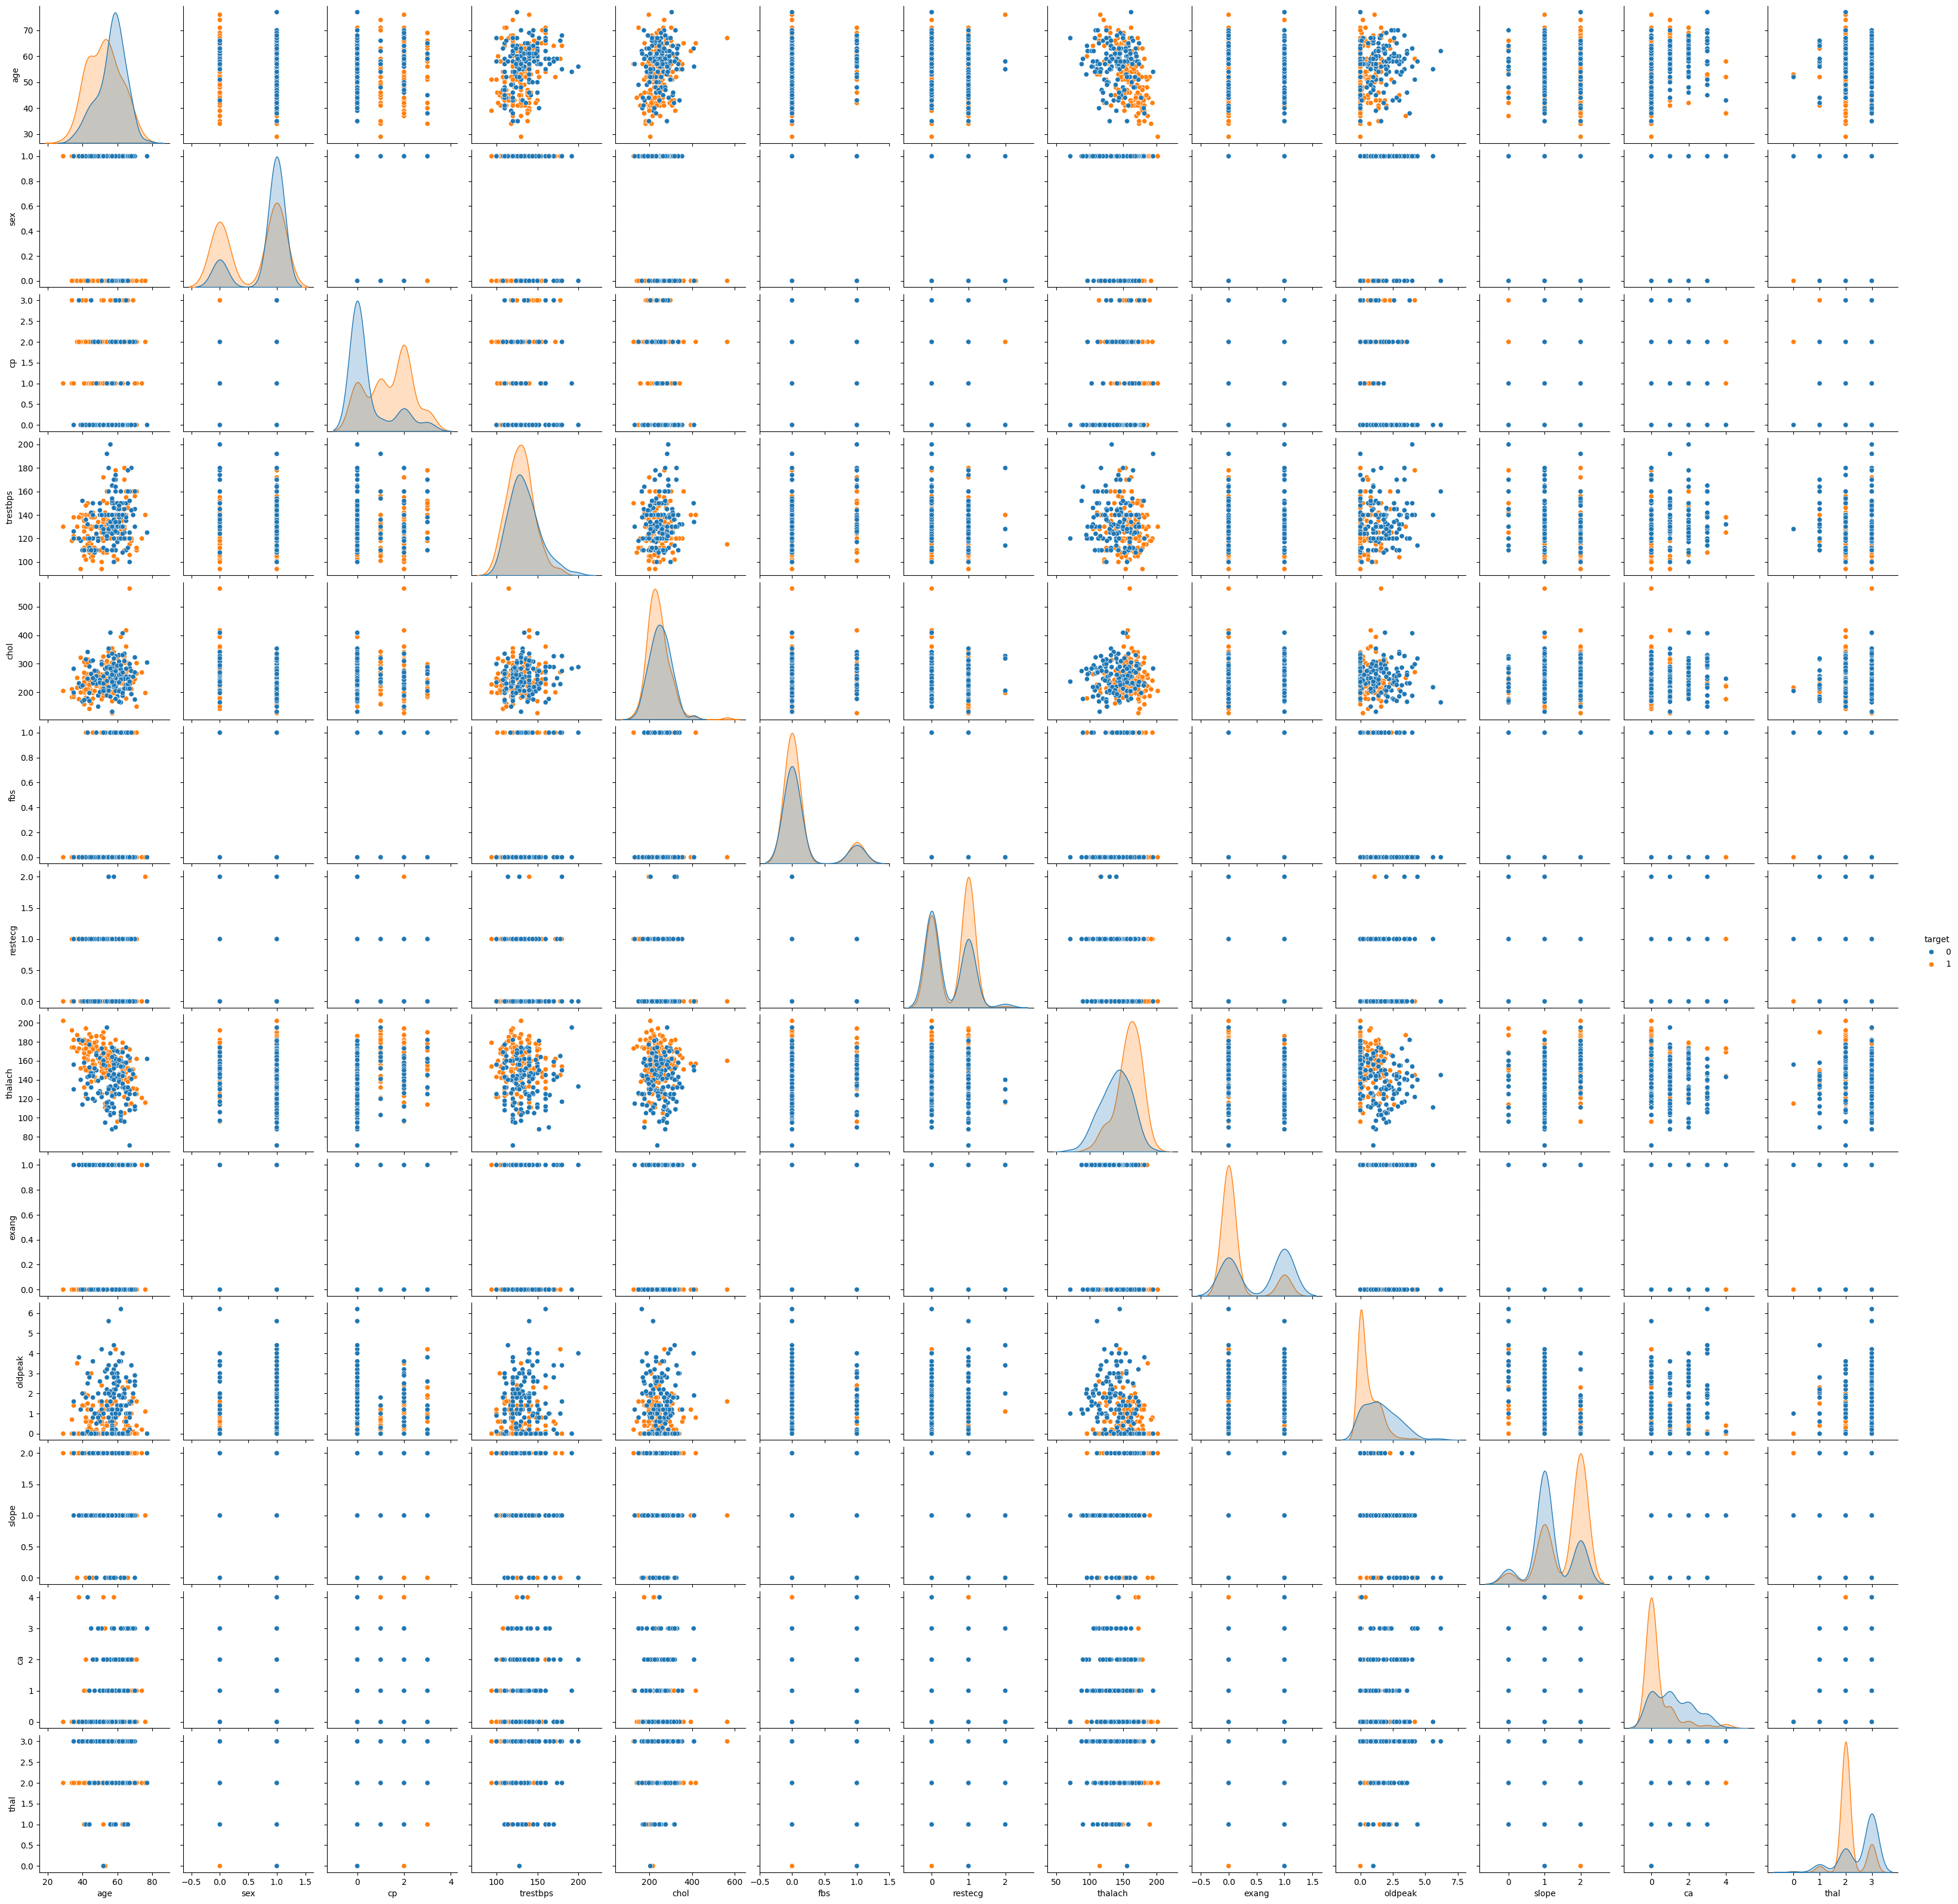

In [10]:
sns.pairplot(data = df , hue = "target")

In [11]:
# Convert DataFrames to NumPy arrays
train_input = X_train.values  
test_input = X_test.values
train_label = y_train.values
test_label = y_test.values
  
# Ensure labels have the correct shape
train_input = train_input.reshape(train_input.shape[0], -1)
test_input = test_input.reshape(test_input.shape[0], -1)

cpu


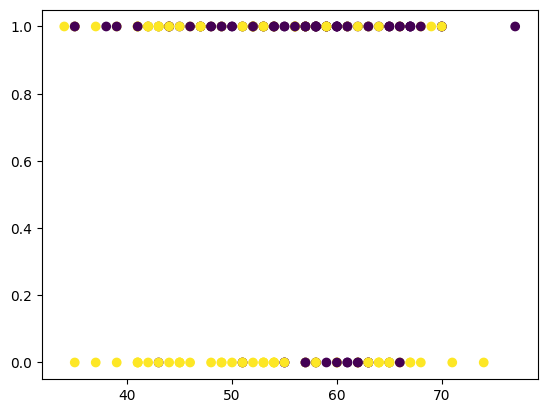

In [12]:
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

dataset = {}
# Convert DataFrames to NumPy arrays
train_input = X_train.values  # or use .to_numpy()
test_input = X_test.values
train_label = y_train.values
test_label = y_test.values

# Ensure labels have the correct shape
train_input = train_input.reshape(train_input.shape[0], -1)
test_input = test_input.reshape(test_input.shape[0], -1)
     
dtype = torch.get_default_dtype()
dataset['train_input'] = torch.from_numpy(train_input).type(dtype).to(device)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype).to(device)     
dataset['train_label'] = torch.from_numpy(train_label[:,None]).type(dtype).to(device)
dataset['test_label'] = torch.from_numpy(test_label[:,None]).type(dtype).to(device)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,1].cpu().detach().numpy(), c=y[:,0].cpu().detach().numpy())

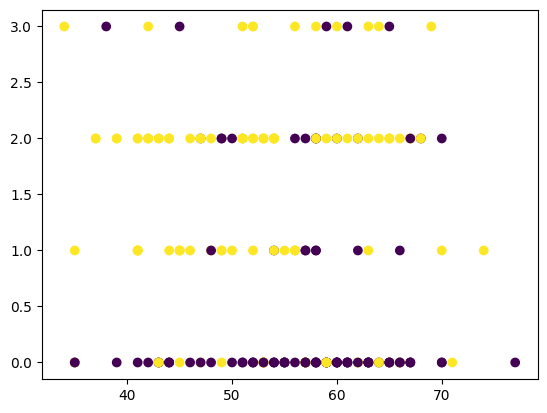

In [13]:
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,2].cpu().detach().numpy(), c=y[:,0].cpu().detach().numpy())

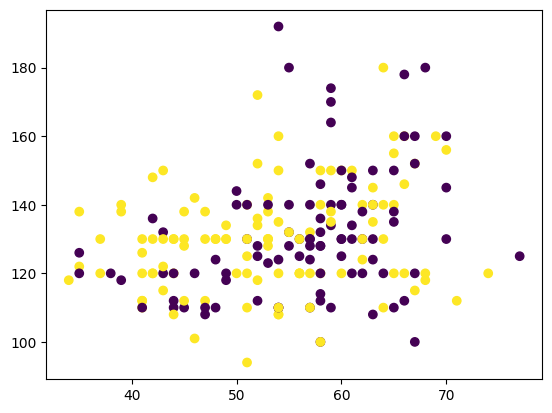

In [14]:
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,3].cpu().detach().numpy(), c=y[:,0].cpu().detach().numpy())

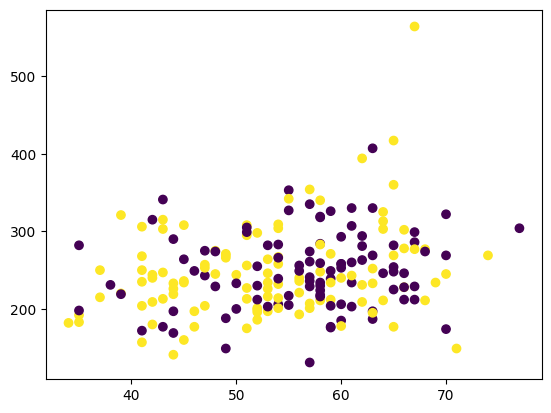

In [15]:
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,4].cpu().detach().numpy(), c=y[:,0].cpu().detach().numpy())

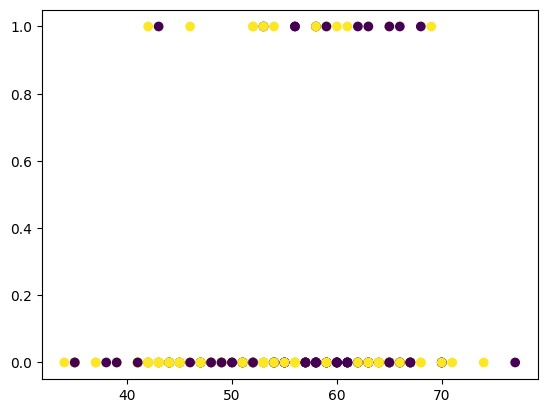

In [16]:
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,5].cpu().detach().numpy(), c=y[:,0].cpu().detach().numpy())

In [17]:
train_input.shape

(203, 13)

In [18]:
test_input.shape

(100, 13)

In [19]:
model = KAN(width=[13 , 1],grid = 3 , k = 3, device= device) 

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).type(dtype))

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).type(dtype))
 

results = model.fit(dataset, opt="LBFGS", steps=50, metrics=(train_acc, test_acc) );        
results['train_acc'][-1], results['test_acc'][-1]               

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 3.69e-01 | reg: 5.30e+00 | : 100%|█| 50/50 [00:13<00:00,  3.58it

saving model version 0.1


(0.8965517282485962, 0.8299999833106995)

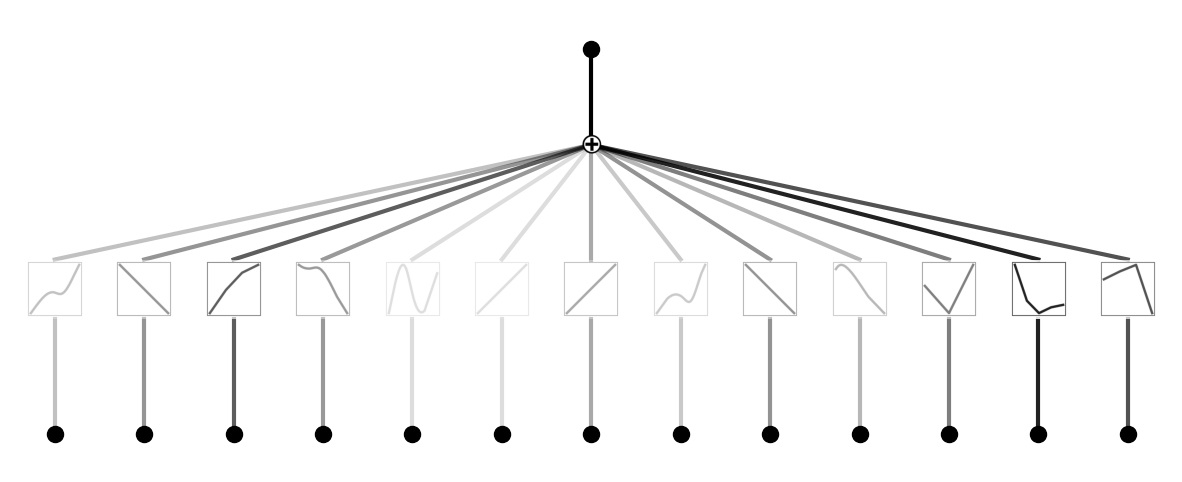

In [20]:
model.plot(scale = 1.5)   

In [21]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
ex_round(formula, 4) 

fixing (0,0,0) with x, r2=0.6485685110092163, c=1
fixing (0,1,0) with x, r2=1.0000003576278687, c=1
fixing (0,2,0) with sin, r2=0.9999920725822449, c=2
fixing (0,3,0) with x, r2=0.606431782245636, c=1
fixing (0,4,0) with x, r2=0.4825330376625061, c=1
fixing (0,5,0) with x, r2=0.999998927116394, c=1
fixing (0,6,0) with x, r2=0.9999985694885254, c=1
fixing (0,7,0) with x, r2=0.1718263179063797, c=1
fixing (0,8,0) with x, r2=1.0000007152557373, c=1
fixing (0,9,0) with sin, r2=0.9918148517608643, c=2
fixing (0,10,0) with x^2, r2=1.0000005960464478, c=2
fixing (0,11,0) with exp, r2=0.987851083278656, c=2
fixing (0,12,0) with tan, r2=0.9999998807907104, c=3
saving model version 0.2


0.0031*x_1 - 0.1389*x_2 - 0.0025*x_4 - 0.0003*x_5 + 0.0477*x_6 + 0.0952*x_7 + 0.0005*x_8 - 0.1356*x_9 + 0.1257*(0.8608 - x_11)**2 + 0.1135*sin(0.5834*x_10 - 5.1767) - 0.3176*sin(0.4411*x_3 + 3.285) - 0.0292*tan(5.3954*x_13 - 2.1854) + 0.2338 + 0.4032*exp(-1.6627*x_12)

### Plotting accuracy vs grid size for kan[13 , 1] with k = 3

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 3.74e-01 | reg: 5.08e+00 | : 100%|█| 50/50 [00:11<00:00,  4.24it


saving model version 0.1
saving model version 0.2


| train_loss: 3.02e-01 | test_loss: 4.04e-01 | reg: 5.06e+00 | : 100%|█| 50/50 [00:11<00:00,  4.19it


saving model version 0.3
saving model version 0.4


| train_loss: 2.86e-01 | test_loss: 4.33e-01 | reg: 5.14e+00 | : 100%|█| 50/50 [00:07<00:00,  6.57it


saving model version 0.5
saving model version 0.6


| train_loss: 2.74e-01 | test_loss: 4.36e-01 | reg: 5.18e+00 | : 100%|█| 50/50 [00:06<00:00,  8.02it


saving model version 0.7
saving model version 0.8


| train_loss: 2.61e-01 | test_loss: 4.54e-01 | reg: 5.33e+00 | : 100%|█| 50/50 [00:06<00:00,  7.50it


saving model version 0.9
saving model version 0.10


| train_loss: 2.55e-01 | test_loss: 4.73e-01 | reg: 5.43e+00 | : 100%|█| 50/50 [00:07<00:00,  6.54it


saving model version 0.11
saving model version 0.12


| train_loss: 2.55e-01 | test_loss: 4.99e-01 | reg: 5.31e+00 | : 100%|█| 50/50 [00:09<00:00,  5.01it


saving model version 0.13
saving model version 0.14


| train_loss: 2.85e-01 | test_loss: 3.86e-01 | reg: 5.48e+00 | : 100%|█| 50/50 [00:08<00:00,  6.07it


saving model version 0.15
saving model version 0.16


| train_loss: 2.71e-01 | test_loss: 4.48e-01 | reg: 5.57e+00 | : 100%|█| 50/50 [00:07<00:00,  6.78it


saving model version 0.17
saving model version 0.18


| train_loss: 2.77e-01 | test_loss: 4.00e-01 | reg: 5.45e+00 | : 100%|█| 50/50 [00:09<00:00,  5.40it


saving model version 0.19
saving model version 0.20


| train_loss: 2.71e-01 | test_loss: 4.32e-01 | reg: 5.48e+00 | : 100%|█| 50/50 [00:10<00:00,  4.91it


saving model version 0.21
saving model version 0.22


| train_loss: 2.57e-01 | test_loss: 4.31e-01 | reg: 5.38e+00 | : 100%|█| 50/50 [00:06<00:00,  7.29it


saving model version 0.23
saving model version 0.24


| train_loss: 2.53e-01 | test_loss: 4.76e-01 | reg: 5.55e+00 | : 100%|█| 50/50 [00:07<00:00,  6.85it


saving model version 0.25
saving model version 0.26


| train_loss: 1.96e-01 | test_loss: 5.40e-01 | reg: 5.47e+00 | : 100%|█| 50/50 [00:07<00:00,  7.01it


saving model version 0.27
saving model version 0.28


| train_loss: 2.35e-01 | test_loss: 5.30e-01 | reg: 5.72e+00 | : 100%|█| 50/50 [00:07<00:00,  7.03it


saving model version 0.29
saving model version 0.30


| train_loss: 1.96e-01 | test_loss: 5.02e-01 | reg: 5.45e+00 | : 100%|█| 50/50 [00:07<00:00,  6.88it


saving model version 0.31
saving model version 0.32


| train_loss: 1.85e-01 | test_loss: 5.27e-01 | reg: 5.87e+00 | : 100%|█| 50/50 [00:06<00:00,  7.80it


saving model version 0.33
saving model version 0.34


| train_loss: 1.60e-01 | test_loss: 4.97e-01 | reg: 5.66e+00 | : 100%|█| 50/50 [00:07<00:00,  6.43it


saving model version 0.35
saving model version 0.36


| train_loss: 1.95e-01 | test_loss: 5.03e-01 | reg: 6.08e+00 | : 100%|█| 50/50 [00:06<00:00,  7.47it


saving model version 0.37
saving model version 0.38


| train_loss: 1.77e-01 | test_loss: 5.03e-01 | reg: 5.67e+00 | : 100%|█| 50/50 [00:08<00:00,  6.21it


saving model version 0.39
saving model version 0.40


| train_loss: 1.42e-01 | test_loss: 5.31e-01 | reg: 5.48e+00 | : 100%|█| 50/50 [00:09<00:00,  5.46it
c:\Users\gaurav\Desktop\KAN NETWORKS\pykan-master\pykan-master\tutorials\.ipynb_checkpoints\my_models\kan\MultKAN.py:1081: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(w_large, w_large))


saving model version 0.41


c:\Users\gaurav\Desktop\KAN NETWORKS\pykan-master\pykan-master\tutorials\.ipynb_checkpoints\my_models\kan\MultKAN.py:1158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10 * scale, 10 * scale * (neuron_depth - 1) * (y0+z0)))


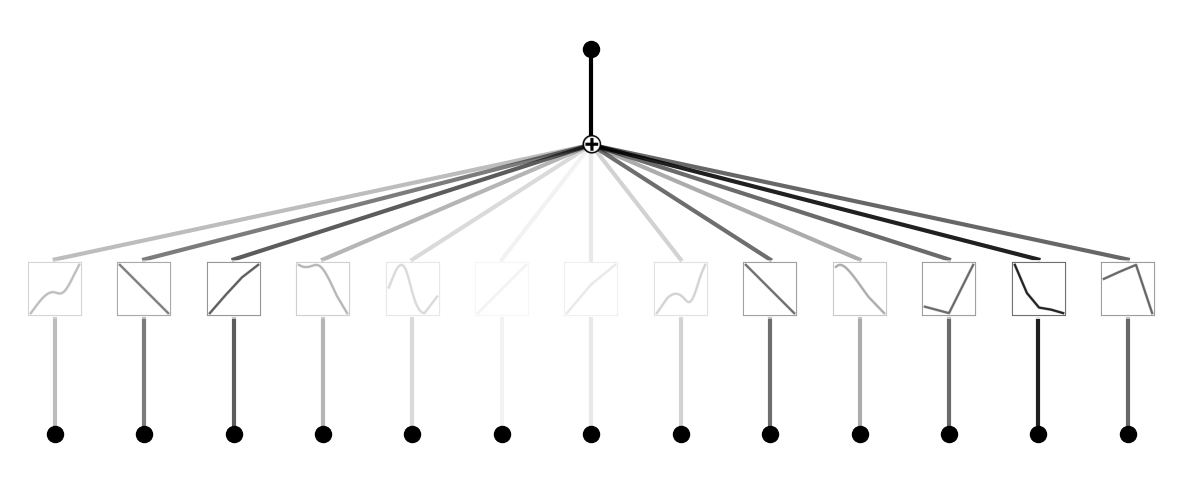

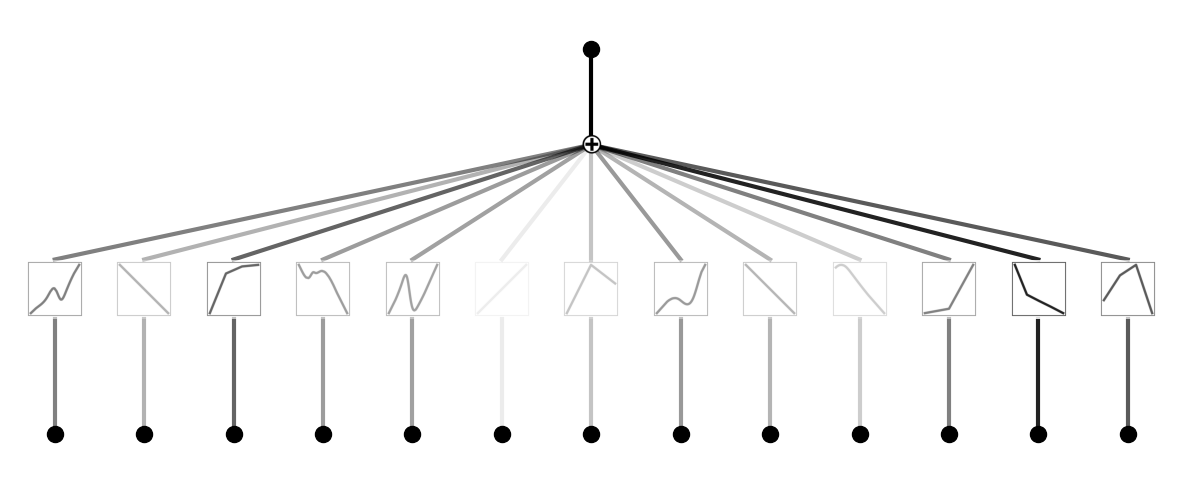

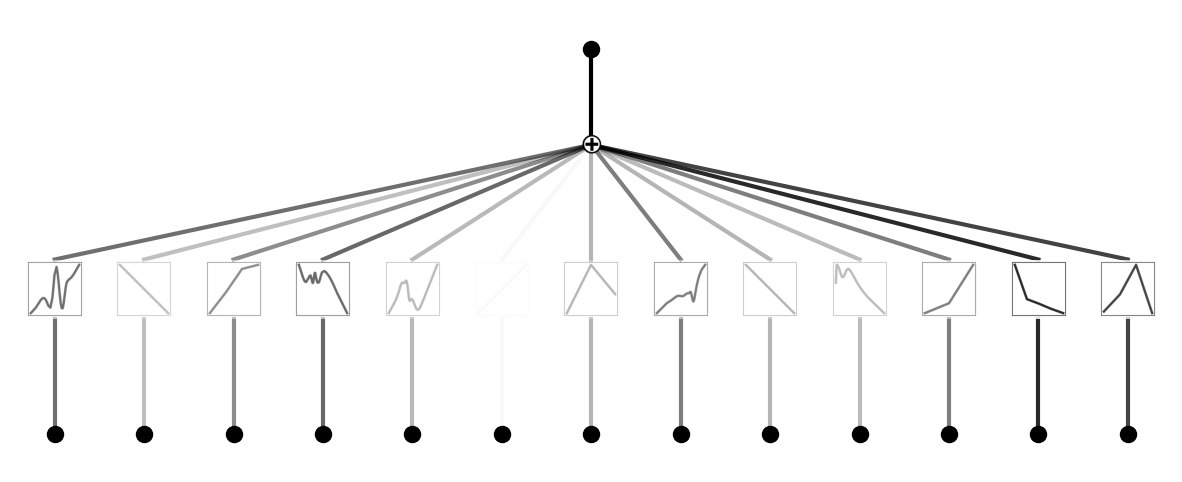

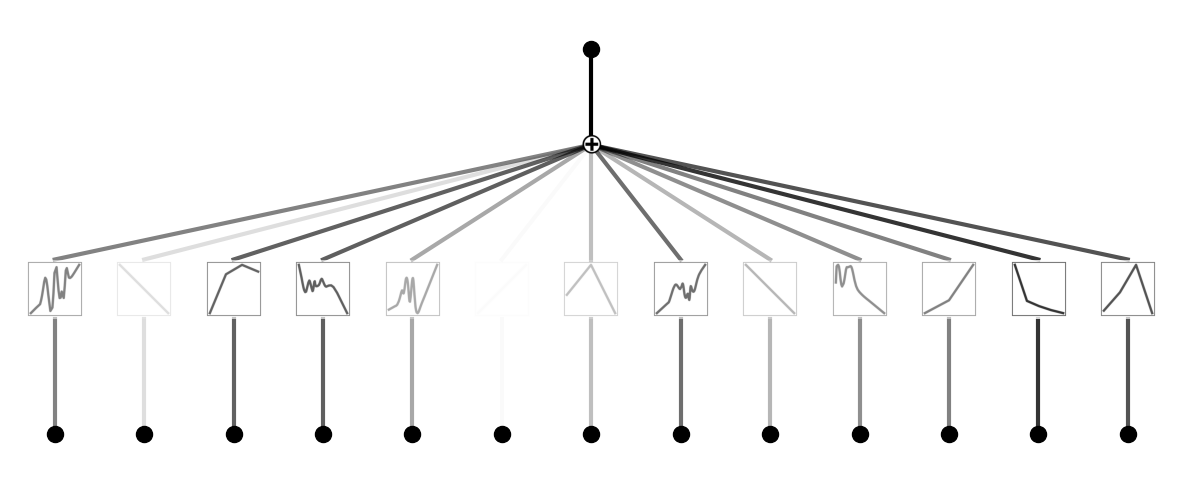

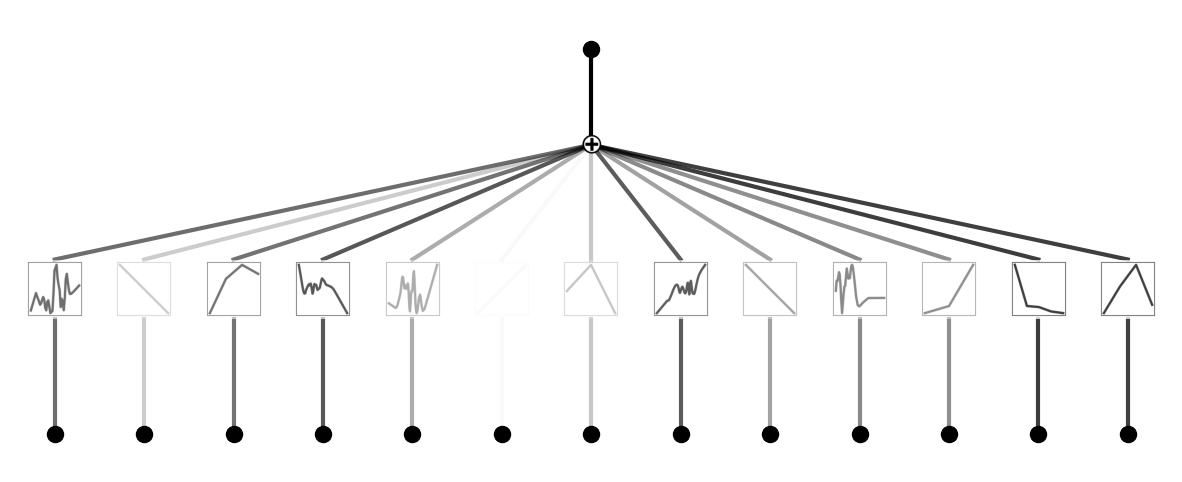

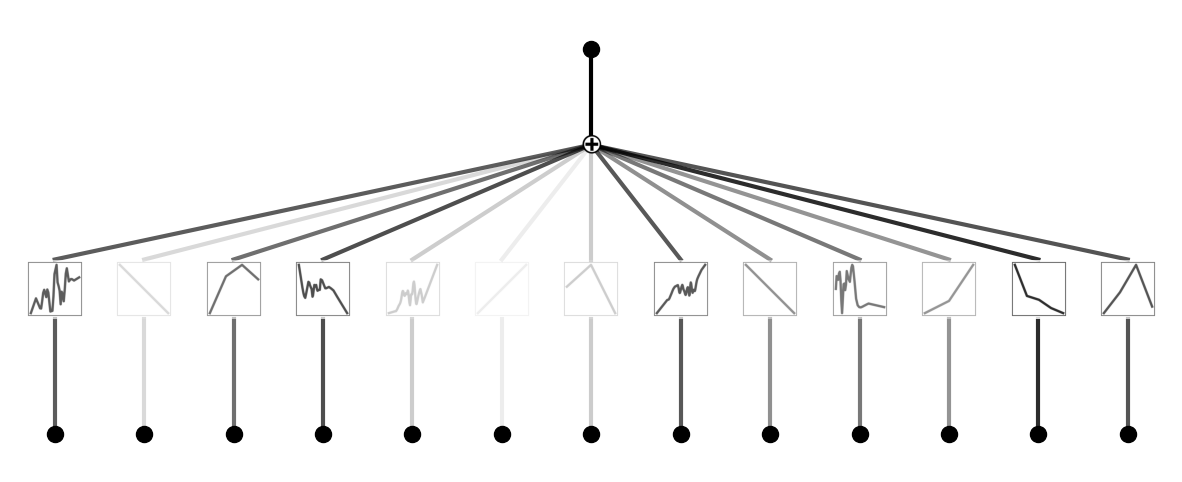

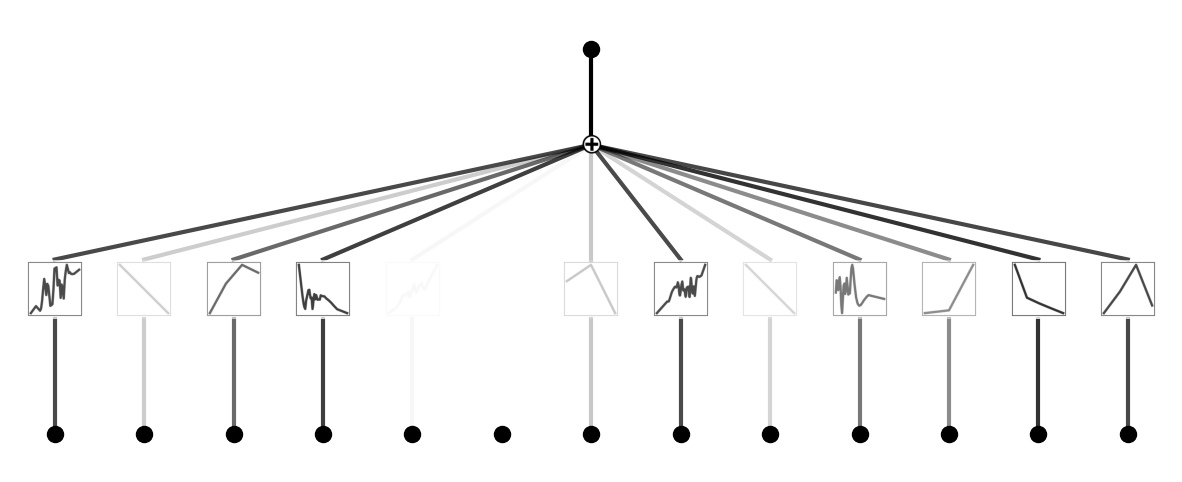

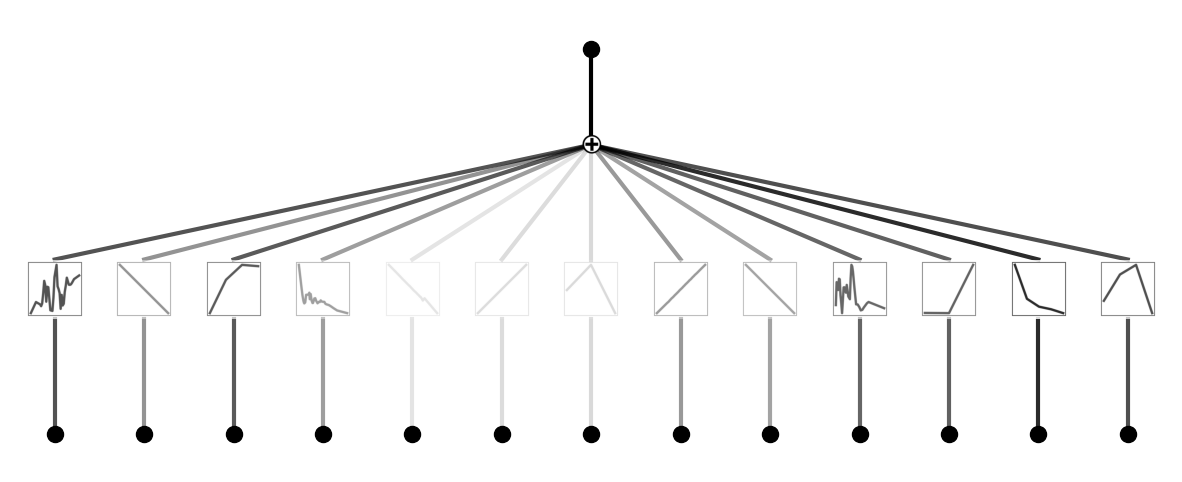

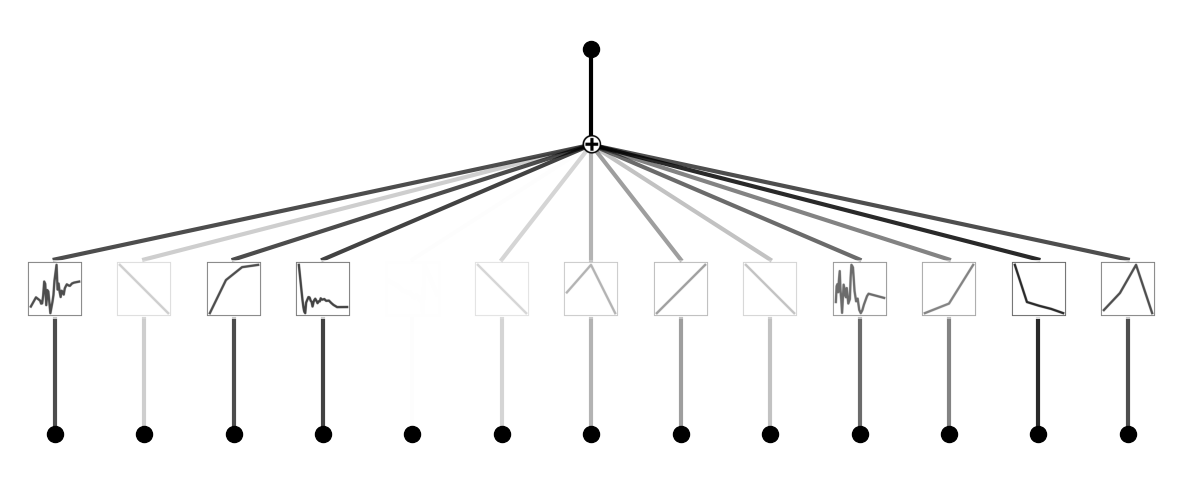

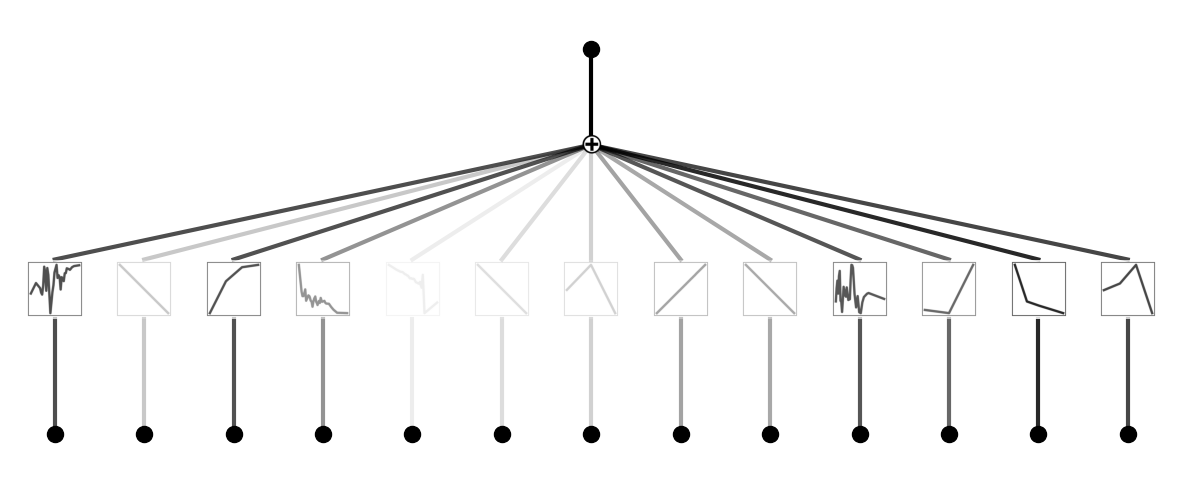

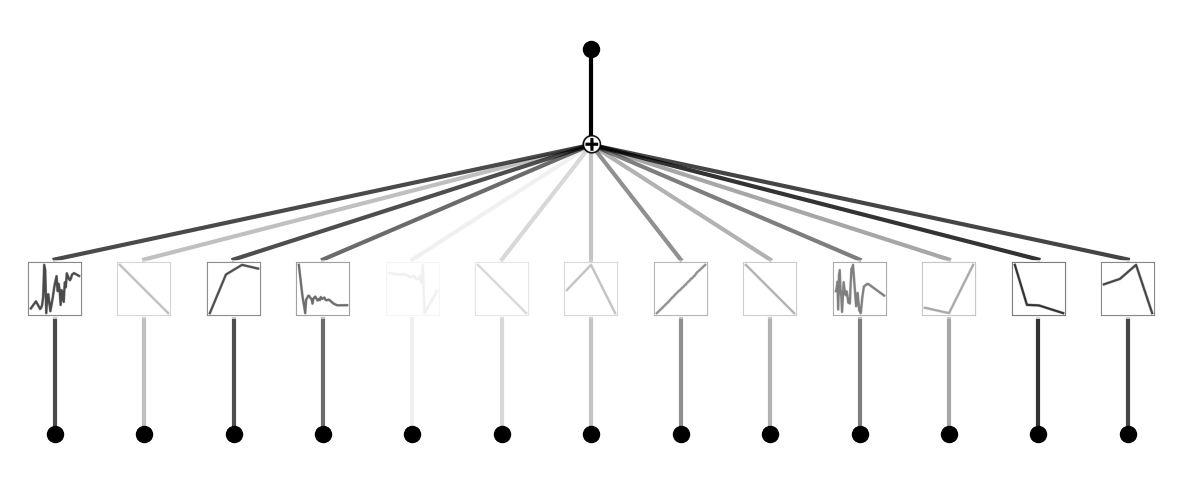

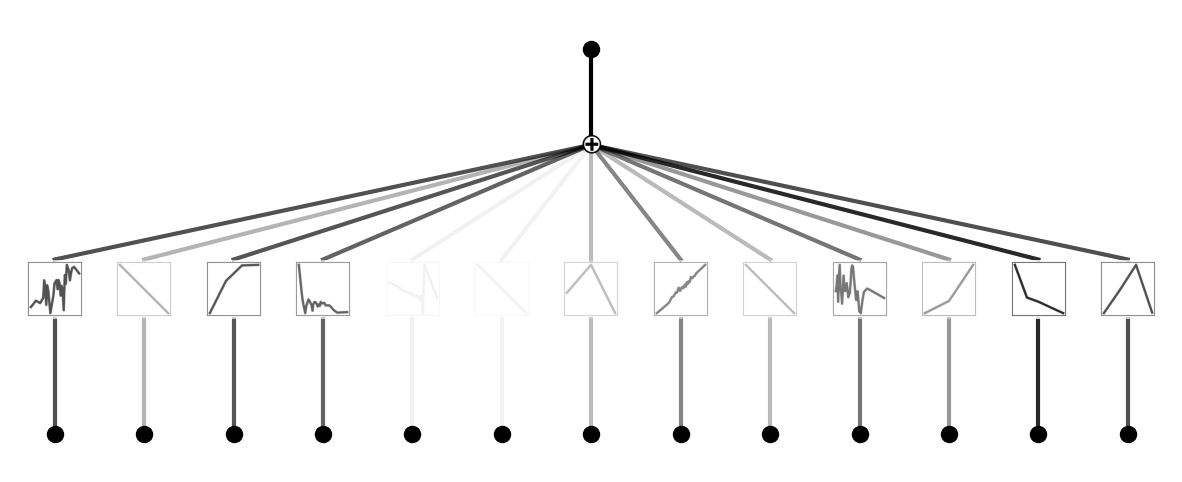

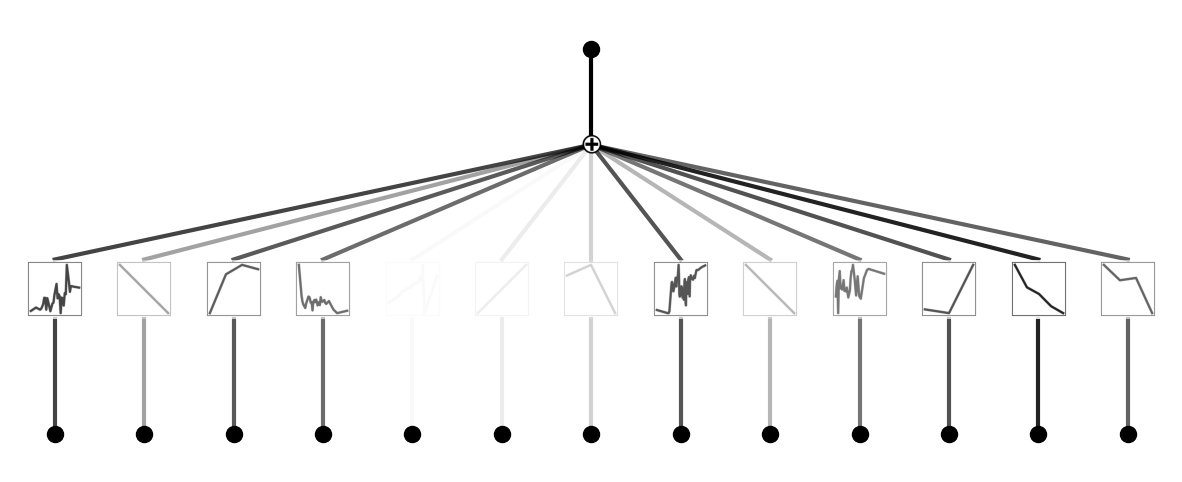

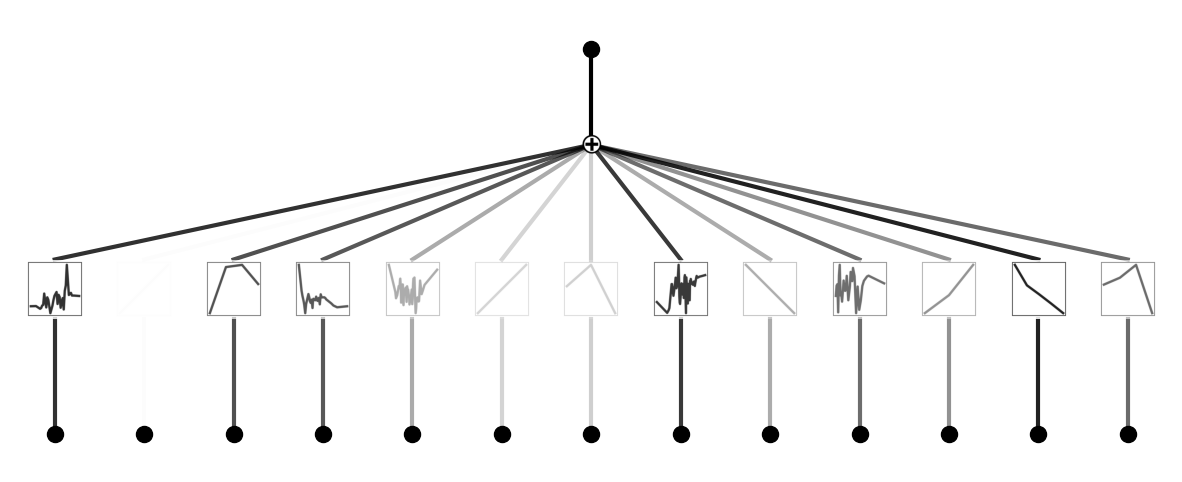

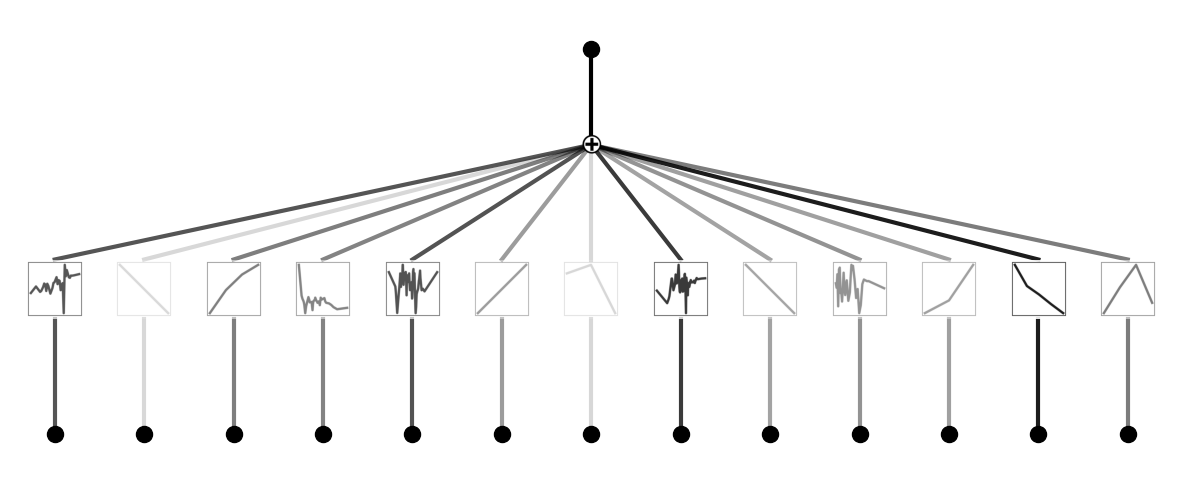

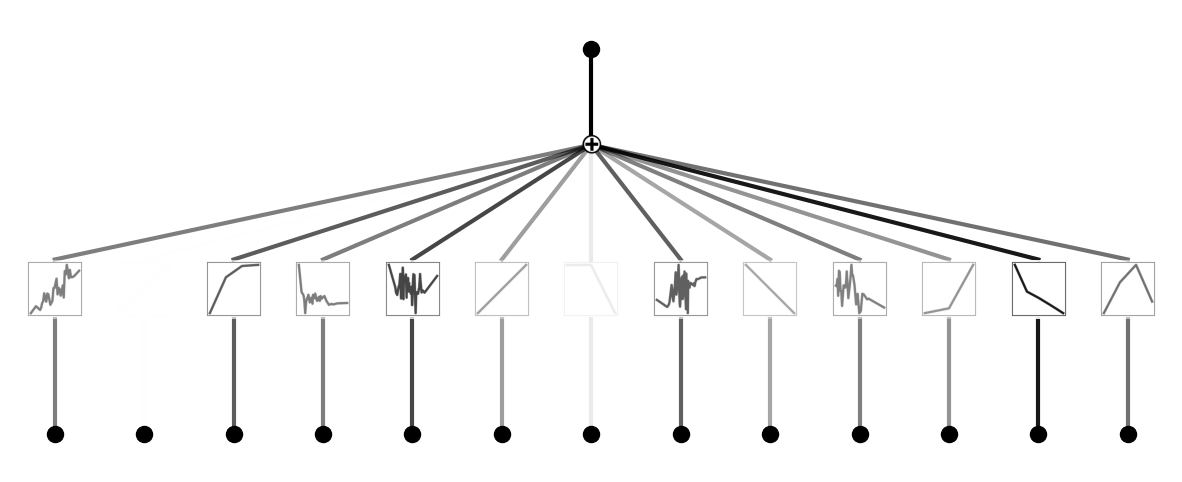

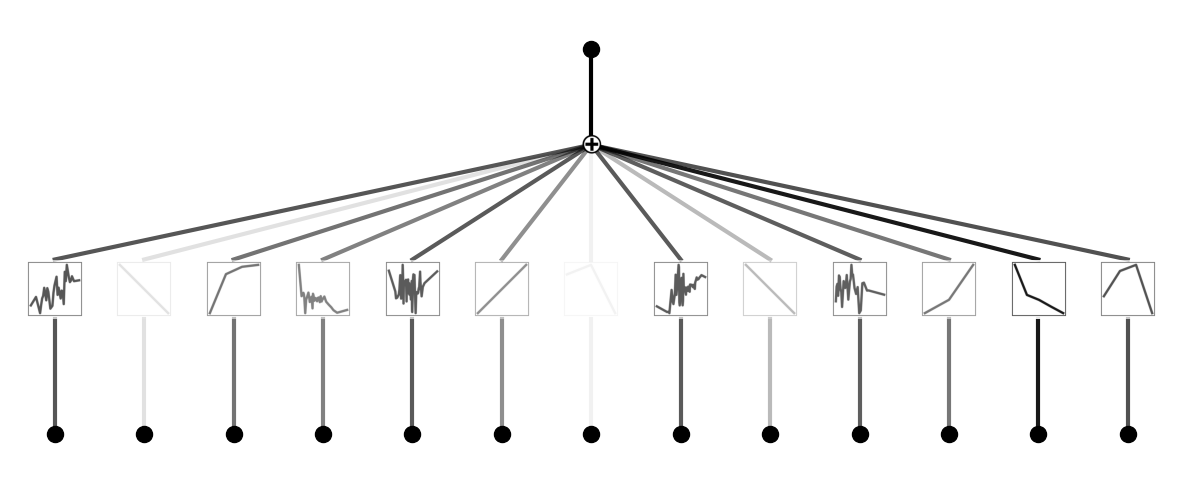

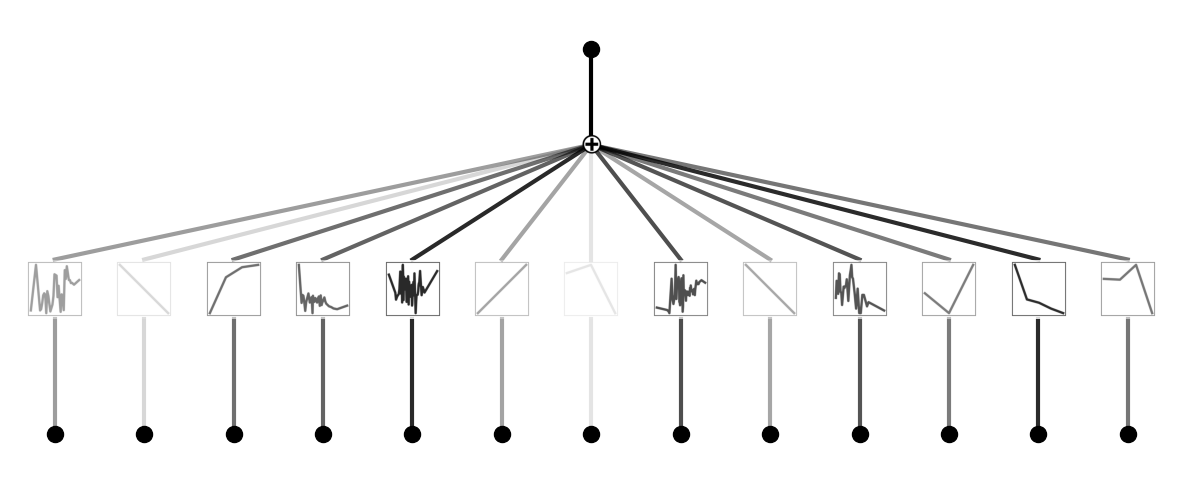

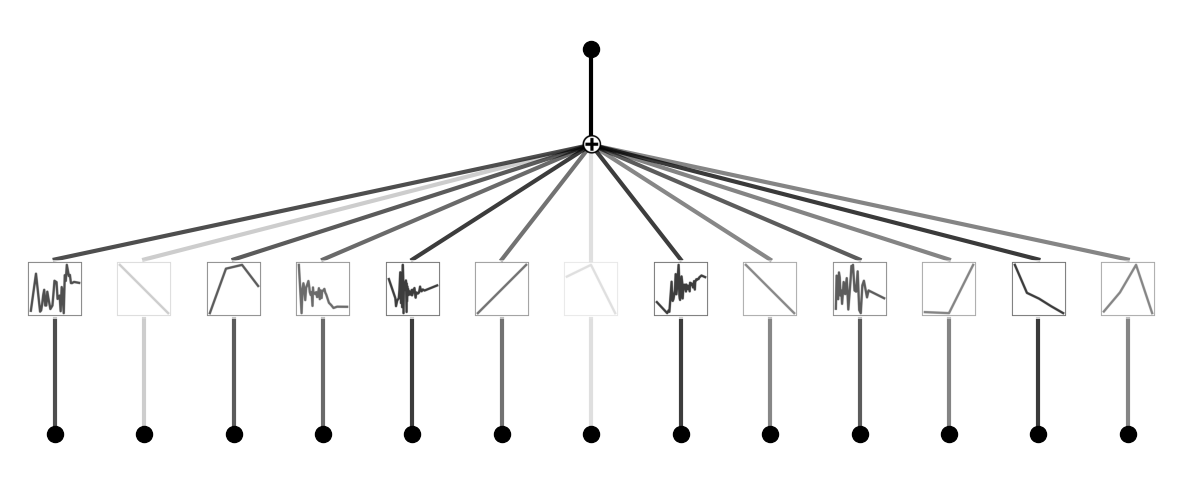

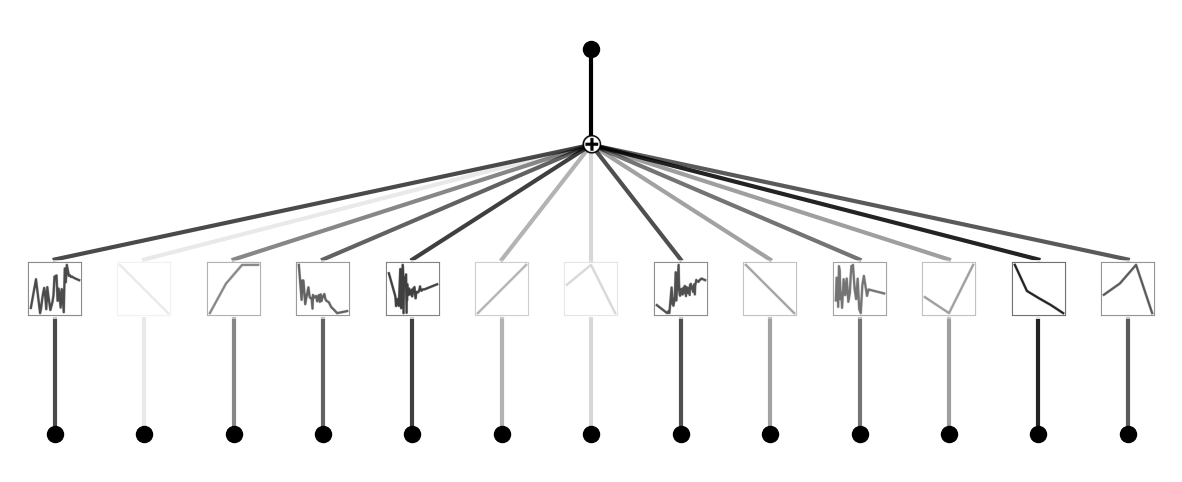

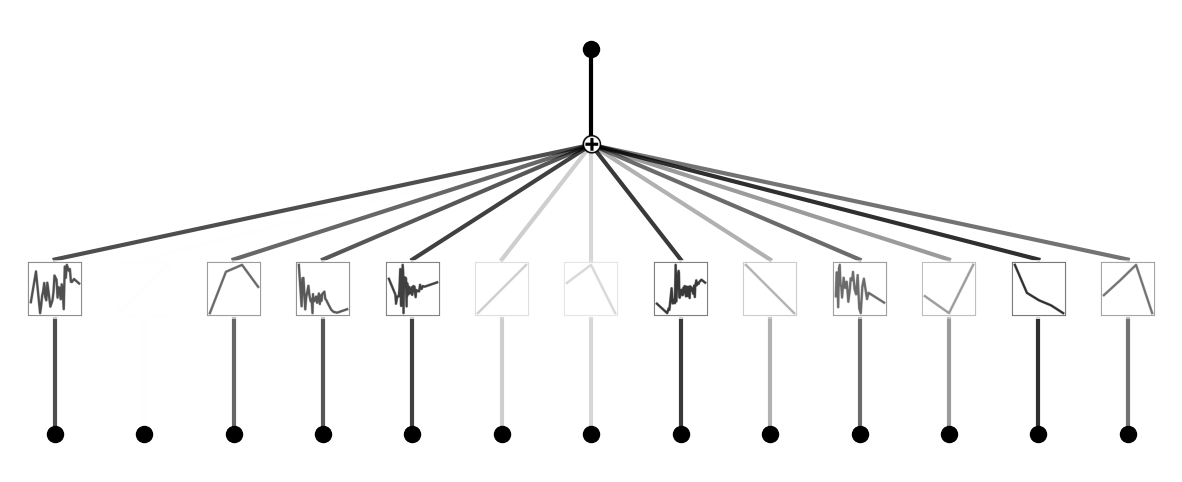

In [22]:
grids = np.array([3, 5 ,10 ,15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 85 , 90 , 95 , 100 ])

train_accuracy = []
test_accuracy = []  

train_losses = []
test_losses = []
steps = 50  
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[13 , 1 ], grid=grids[i], k=k, seed=1, device=device)
    def train_acc():
        return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).type(dtype))

    def test_acc():
        return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).type(dtype))
        
  
    if i != 0:
        model = model.refine(grids[i])    
        
    def train_acc():
        return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).type(dtype))

    def test_acc():
        return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).type(dtype))
            
    results = model.fit(dataset, opt="LBFGS", steps=steps , metrics = (train_acc , test_acc))                     
    train_losses += results['train_loss']   
    test_losses += results['test_loss']   
                     
    train_accuracy.append(results['train_acc'][-1])
    test_accuracy.append(results['test_acc'][-1])     
    
    model.plot(scale=1.5)   
        

(0.0, 1.0)

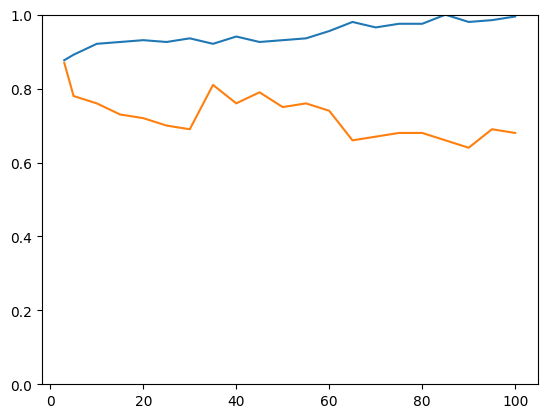

In [23]:
plt.plot(grids , train_accuracy)
plt.plot(grids , test_accuracy) 
plt.ylim(0,1) 

### plotting accuracy grpahs with respect to k  for kan[13 , 1] of grid = 30 

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.60e-01 | test_loss: 4.77e-01 | reg: 4.93e+00 | : 100%|█| 50/50 [00:05<00:00,  9.76it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.71e-01 | test_loss: 4.27e-01 | reg: 4.79e+00 | : 100%|█| 50/50 [00:05<00:00,  9.91it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.75e-01 | test_loss: 4.32e-01 | reg: 4.93e+00 | : 100%|█| 50/50 [00:06<00:00,  8.07it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.81e-01 | test_loss: 4.17e-01 | reg: 5.13e+00 | : 100%|█| 50/50 [00:09<00:00,  5.07it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.85e-01 | test_loss: 4.05e-01 | reg: 4.82e+00 | : 100%|█| 50/50 [00:06<00:00,  7.34it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.84e-01 | test_loss: 4.17e-01 | reg: 5.29e+00 | : 100%|█| 50/50 [00:07<00:00,  6.94it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.91e-01 | test_loss: 3.99e-01 | reg: 5.28e+00 | : 100%|█| 50/50 [00:07<00:00,  6.76it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.94e-01 | test_loss: 3.97e-01 | reg: 5.17e+00 | : 100%|█| 50/50 [00:08<00:00,  6.04it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.98e-01 | test_loss: 3.89e-01 | reg: 5.28e+00 | : 100%|█| 50/50 [00:10<00:00,  4.69it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.12e-01 | test_loss: 3.80e-01 | reg: 5.13e+00 | : 100%|█| 50/50 [00:13<00:00,  3.81it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 3.86e-01 | reg: 5.00e+00 | : 100%|█| 50/50 [00:10<00:00,  4.96it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.07e-01 | test_loss: 3.68e-01 | reg: 5.00e+00 | : 100%|█| 50/50 [00:10<00:00,  4.97it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.97e-01 | test_loss: 3.90e-01 | reg: 5.38e+00 | : 100%|█| 50/50 [00:13<00:00,  3.74it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.10e-01 | test_loss: 3.62e-01 | reg: 5.32e+00 | : 100%|█| 50/50 [00:24<00:00,  2.03it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.03e-01 | test_loss: 3.83e-01 | reg: 4.95e+00 | : 100%|█| 50/50 [00:25<00:00,  1.97it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.07e-01 | test_loss: 4.01e-01 | reg: 5.54e+00 | : 100%|█| 50/50 [00:27<00:00,  1.82it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.99e-01 | test_loss: 3.96e-01 | reg: 4.90e+00 | : 100%|█| 50/50 [00:32<00:00,  1.54it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.05e-01 | test_loss: 3.87e-01 | reg: 5.31e+00 | : 100%|█| 50/50 [00:18<00:00,  2.77it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.93e-01 | test_loss: 4.01e-01 | reg: 5.25e+00 | : 100%|█| 50/50 [00:22<00:00,  2.18it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.02e-01 | test_loss: 3.79e-01 | reg: 5.05e+00 | : 100%|█| 50/50 [00:21<00:00,  2.38it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.09e-01 | test_loss: 3.90e-01 | reg: 4.91e+00 | : 100%|█| 50/50 [00:19<00:00,  2.55it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.08e-01 | test_loss: 3.74e-01 | reg: 5.27e+00 | : 100%|█| 50/50 [00:18<00:00,  2.69it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.05e-01 | test_loss: 3.79e-01 | reg: 5.06e+00 | : 100%|█| 50/50 [00:36<00:00,  1.38it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.17e-01 | test_loss: 3.88e-01 | reg: 5.07e+00 | : 100%|█| 50/50 [00:26<00:00,  1.92it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.09e-01 | test_loss: 3.76e-01 | reg: 5.07e+00 | : 100%|█| 50/50 [00:28<00:00,  1.74it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.08e-01 | test_loss: 3.97e-01 | reg: 5.41e+00 | : 100%|█| 50/50 [00:28<00:00,  1.75it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 4.00e-01 | reg: 5.47e+00 | : 100%|█| 50/50 [00:35<00:00,  1.40it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.05e-01 | test_loss: 4.00e-01 | reg: 4.95e+00 | : 100%|█| 50/50 [00:30<00:00,  1.65it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.04e-01 | test_loss: 3.91e-01 | reg: 5.20e+00 | : 100%|█| 50/50 [00:27<00:00,  1.79it


saving model version 0.1


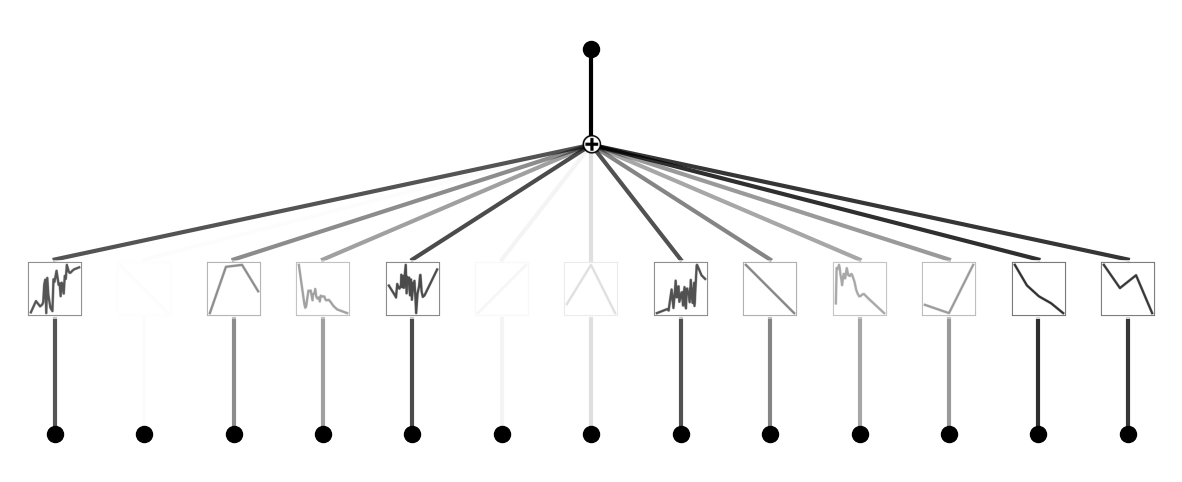

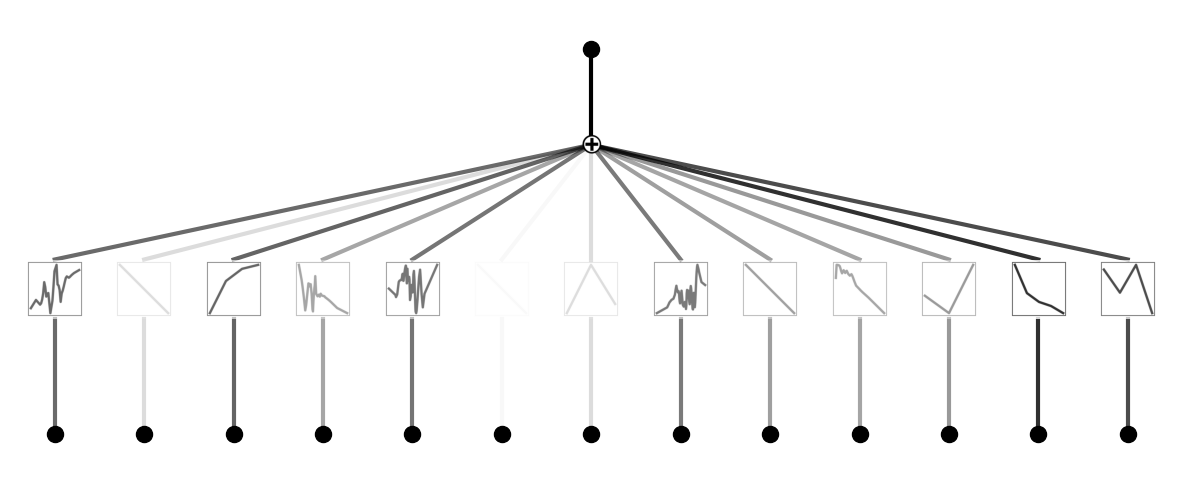

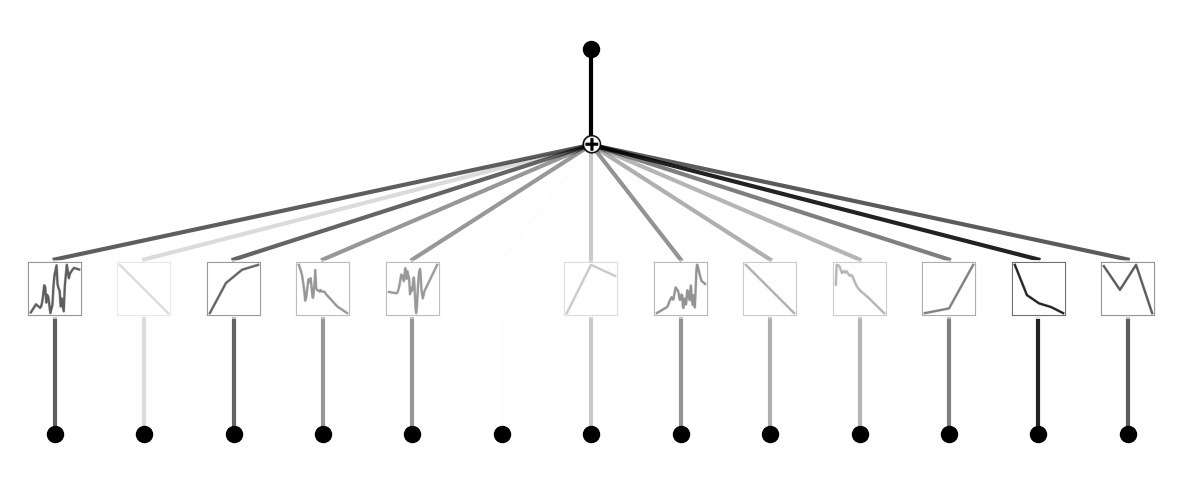

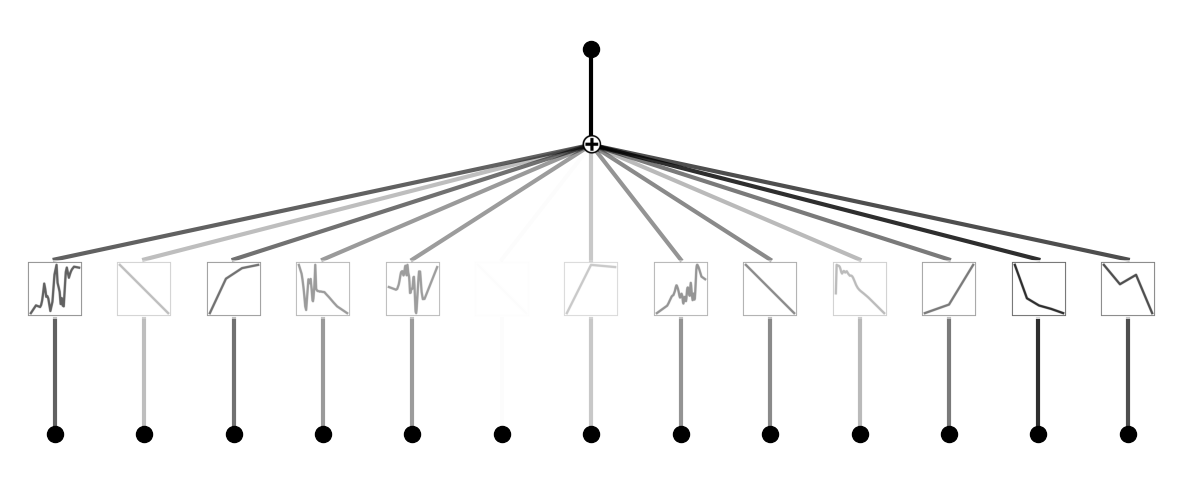

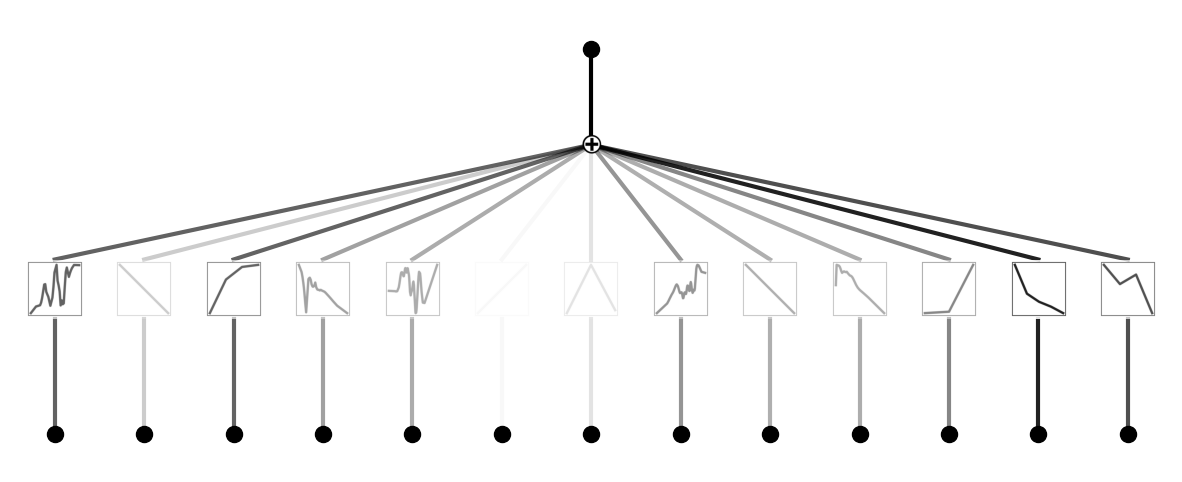

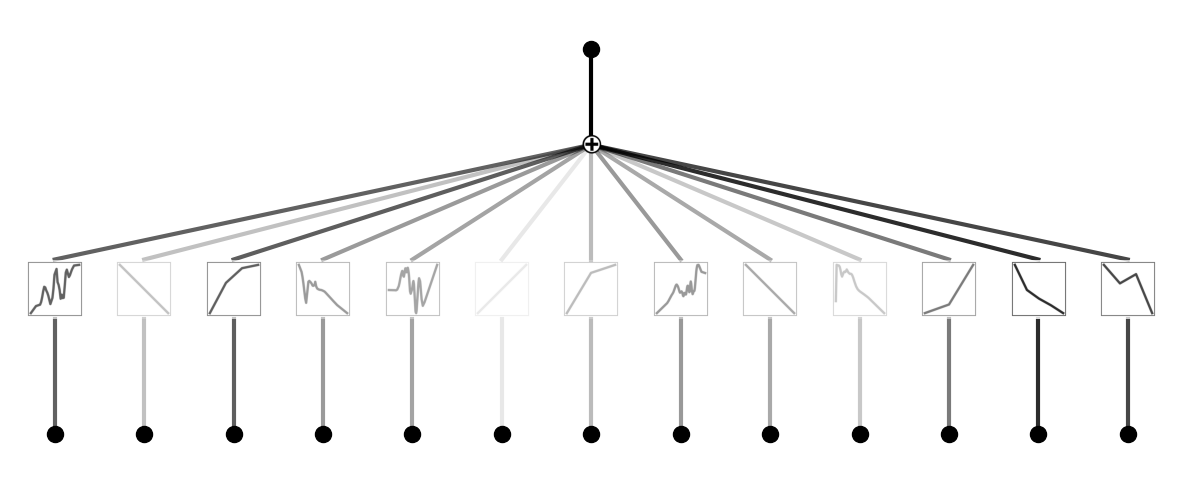

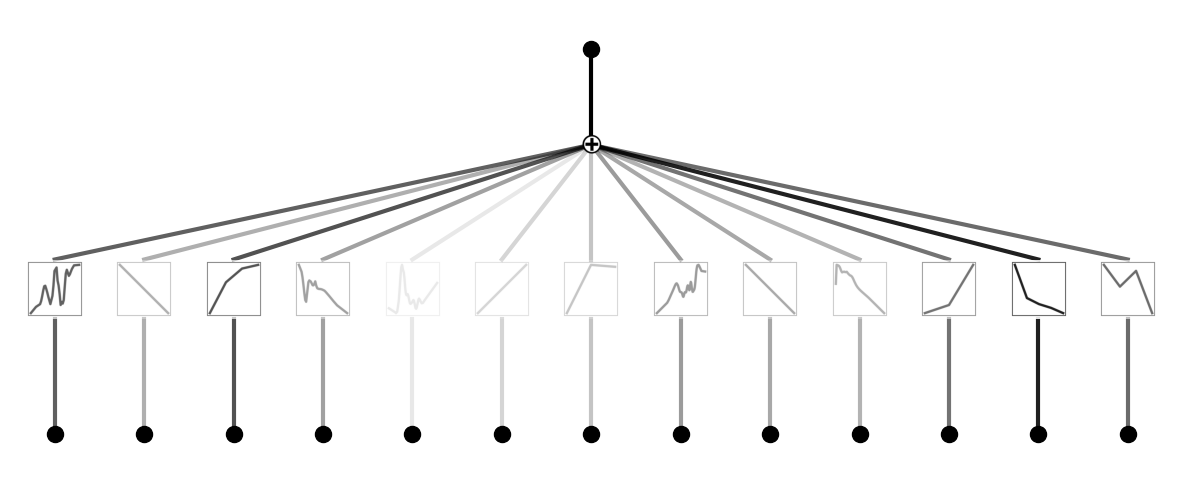

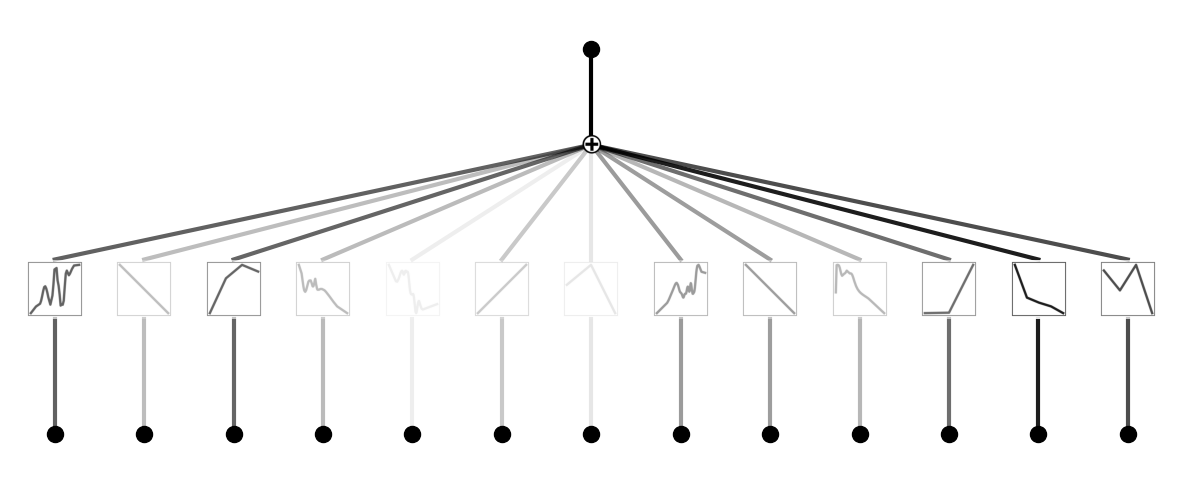

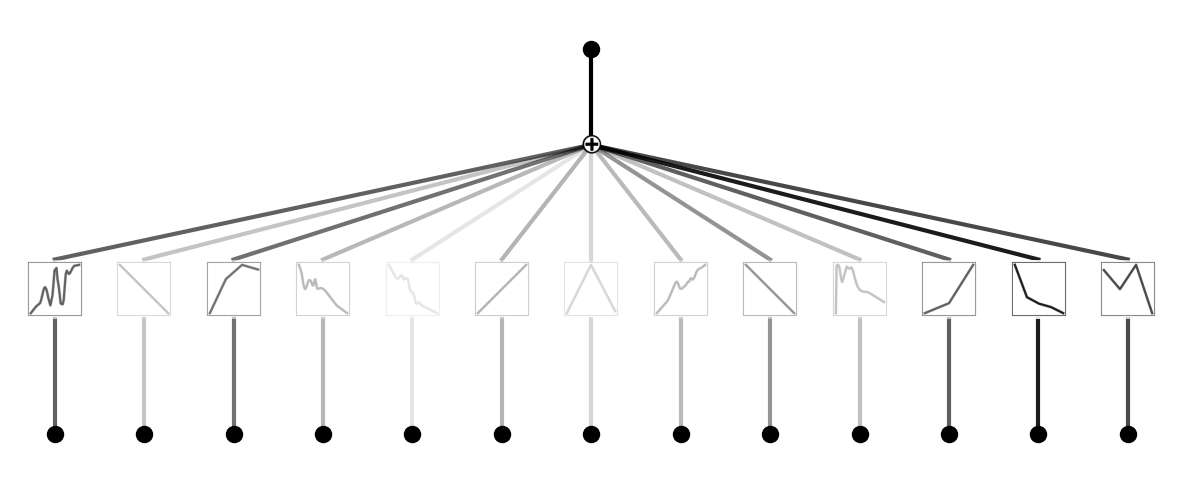

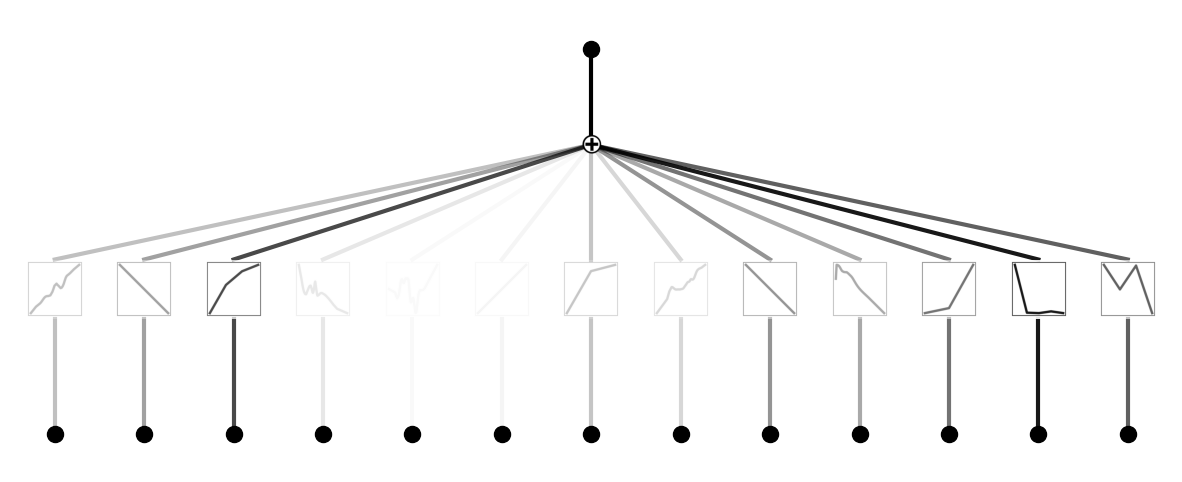

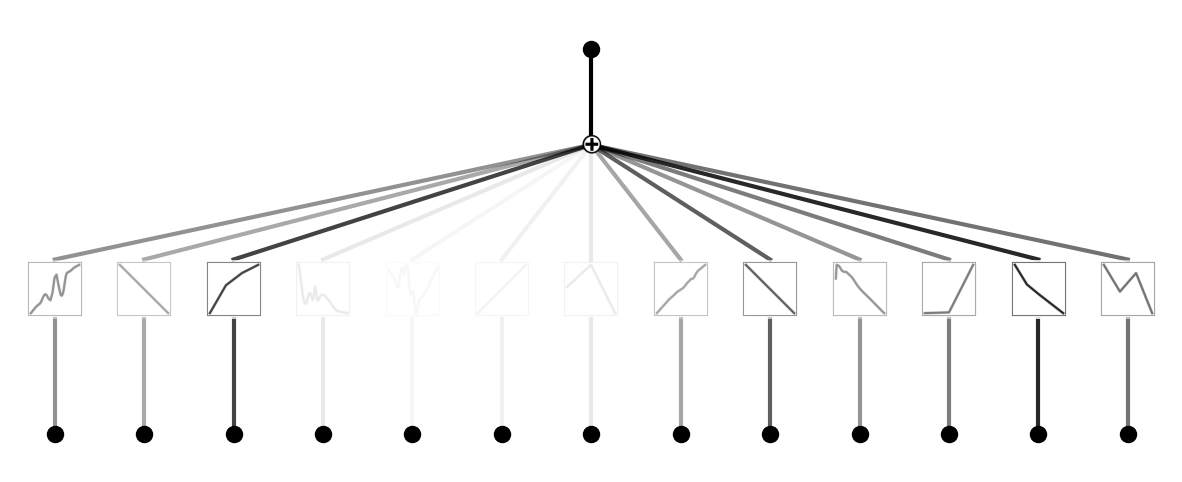

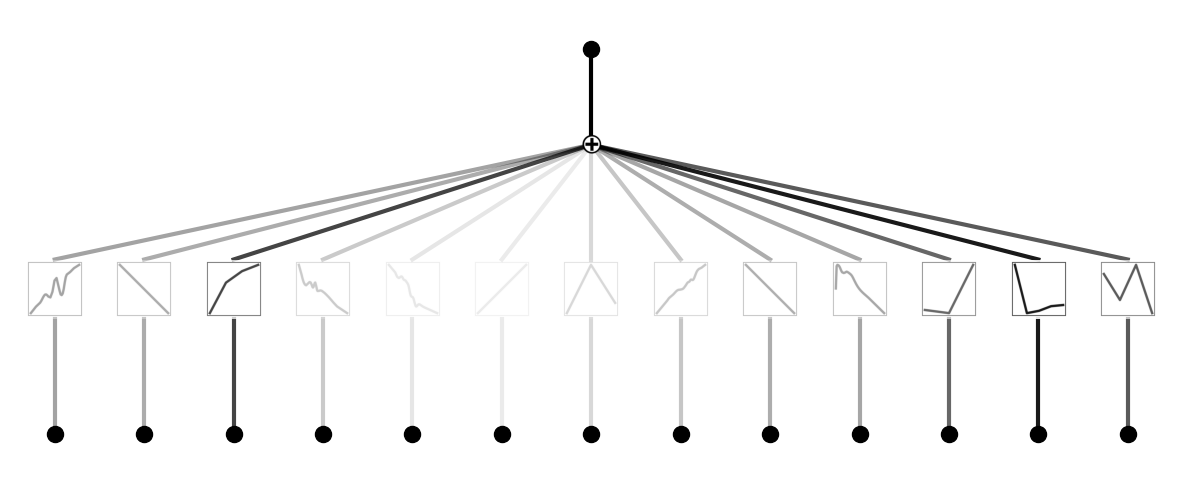

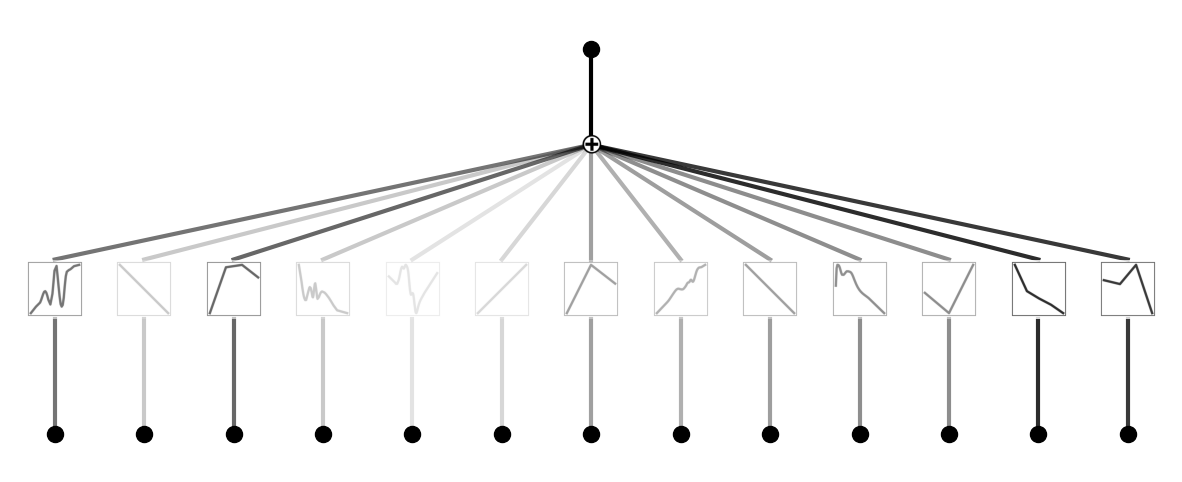

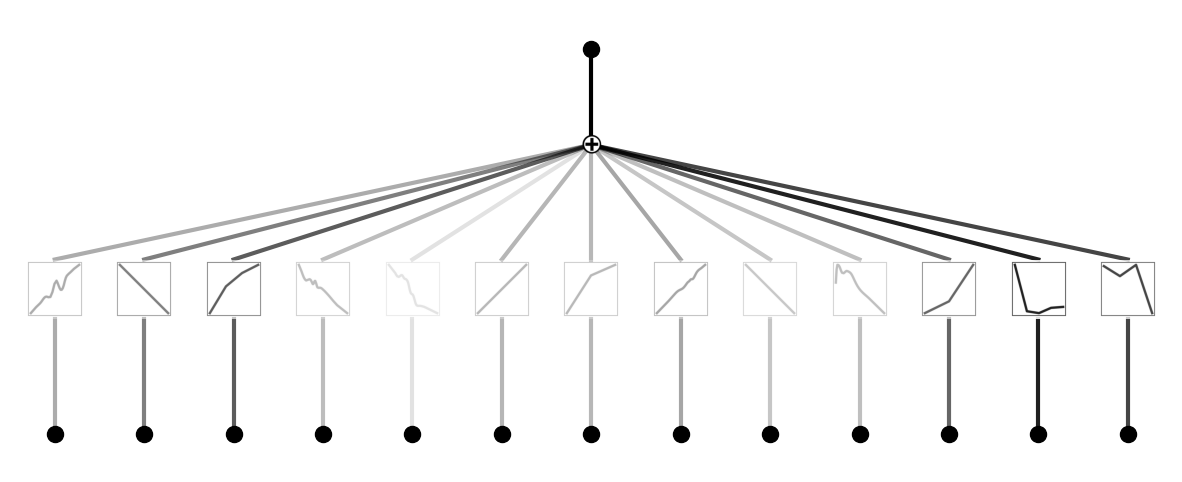

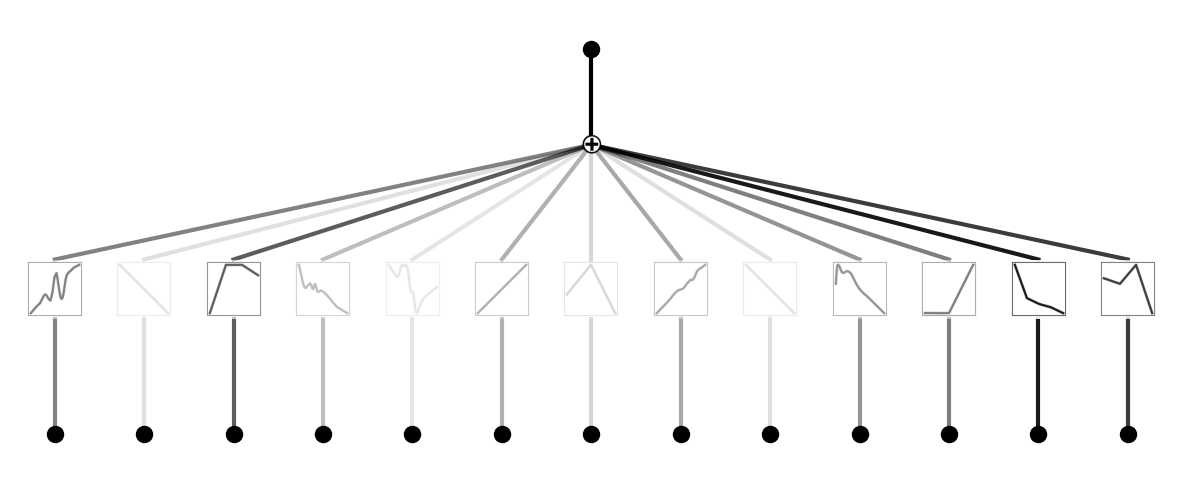

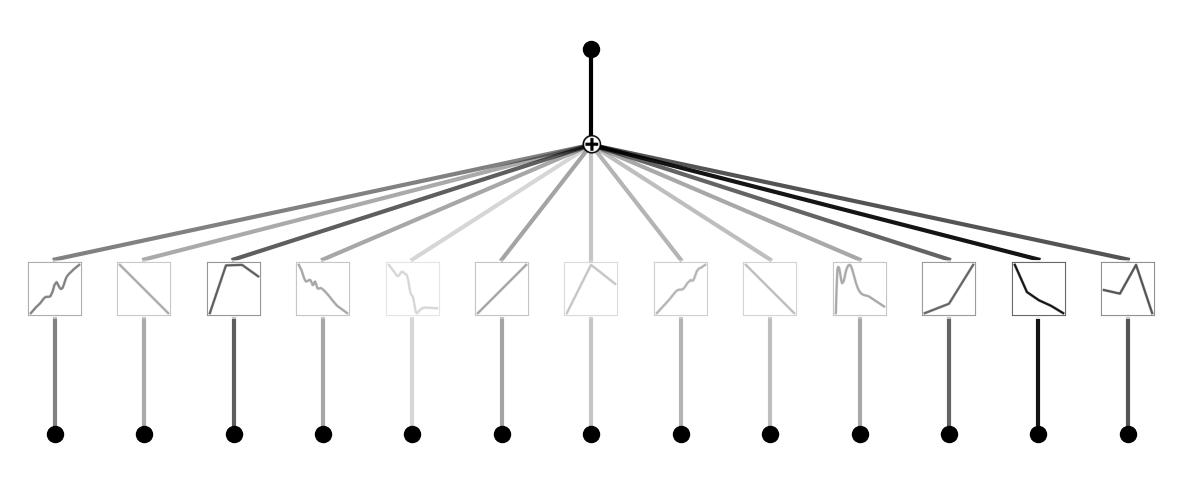

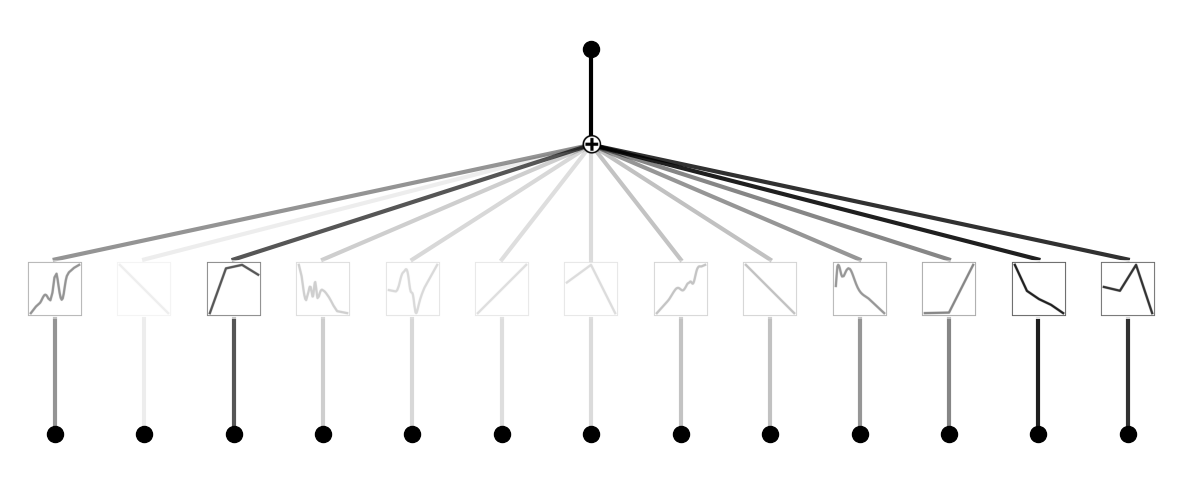

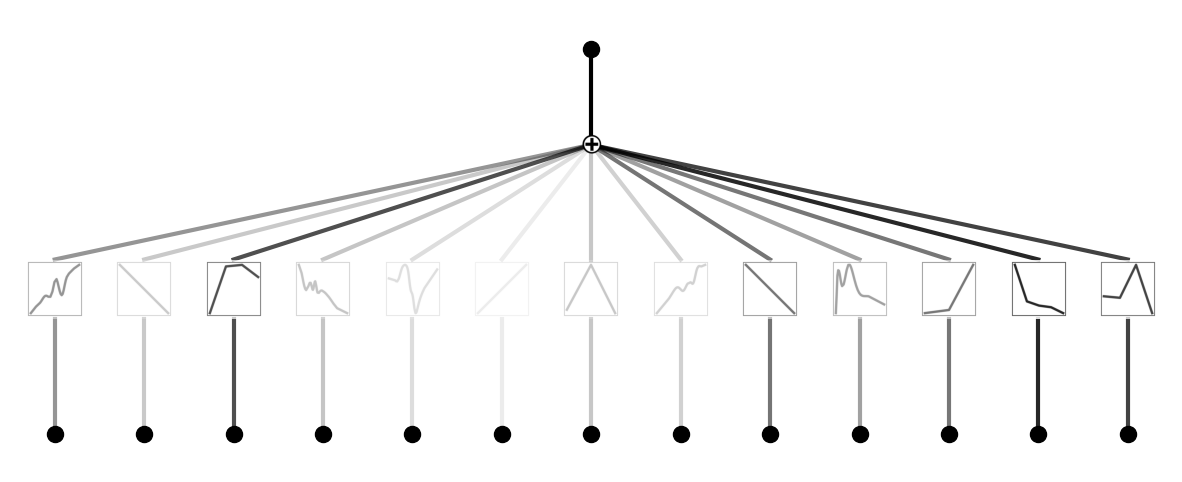

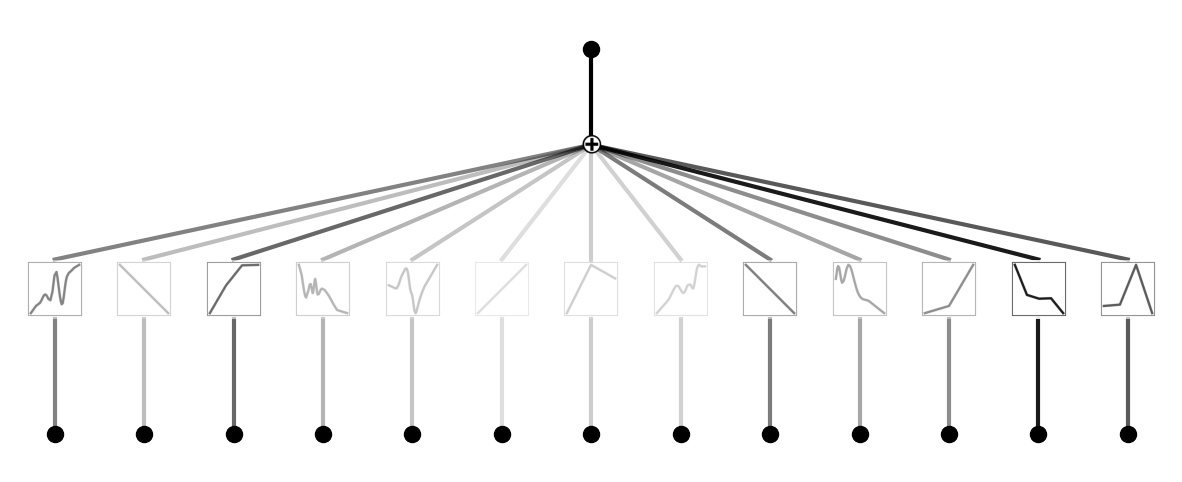

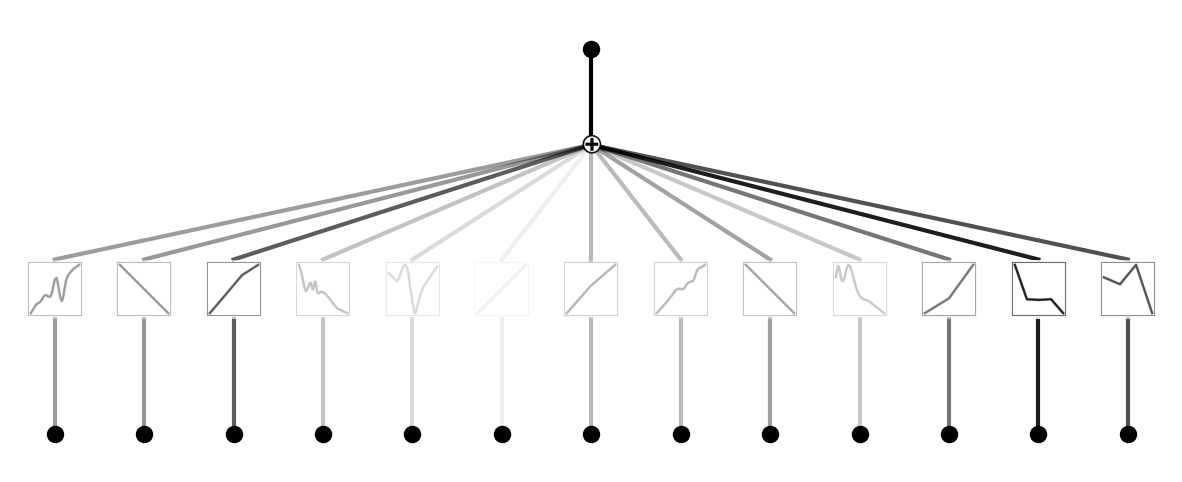

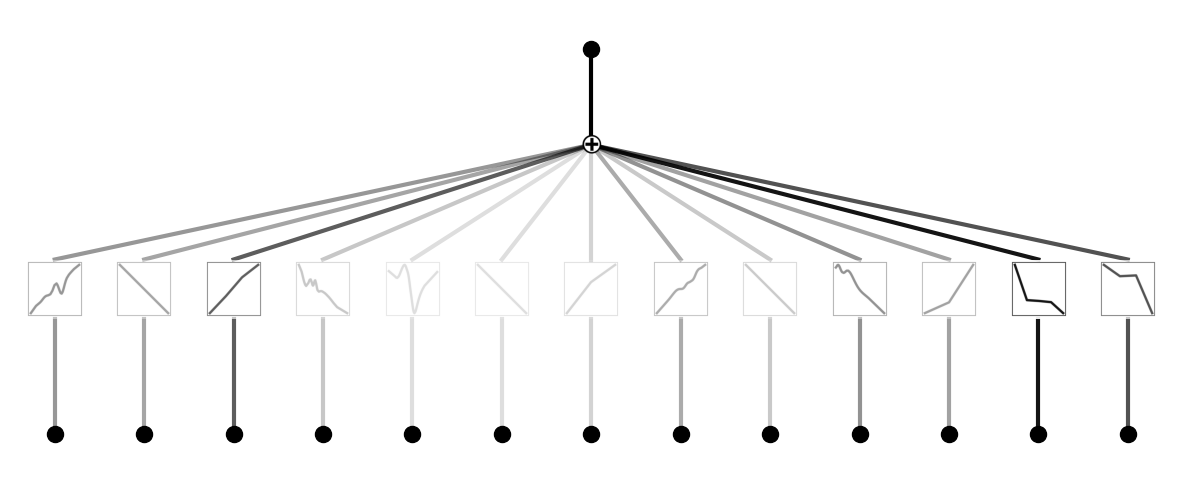

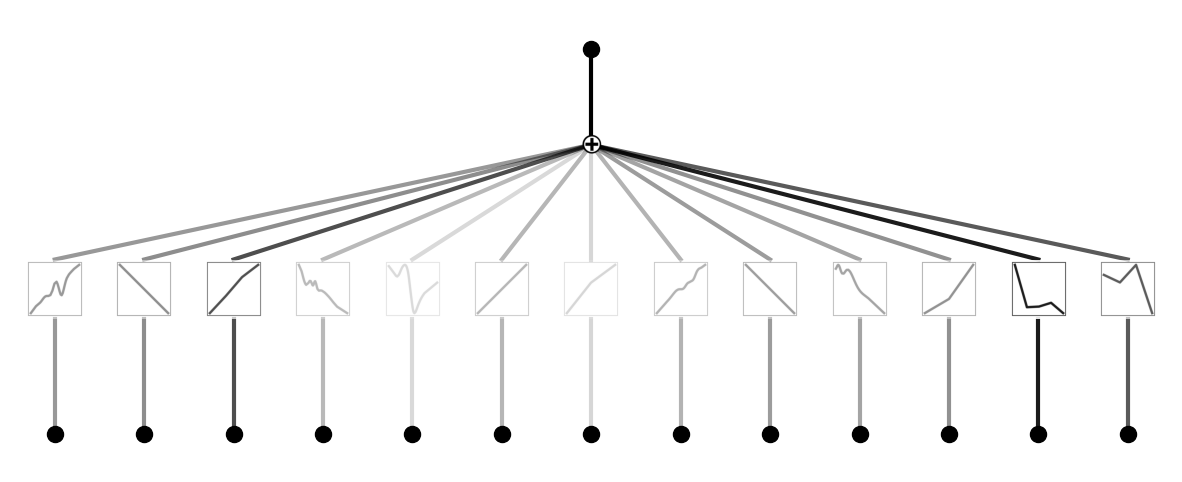

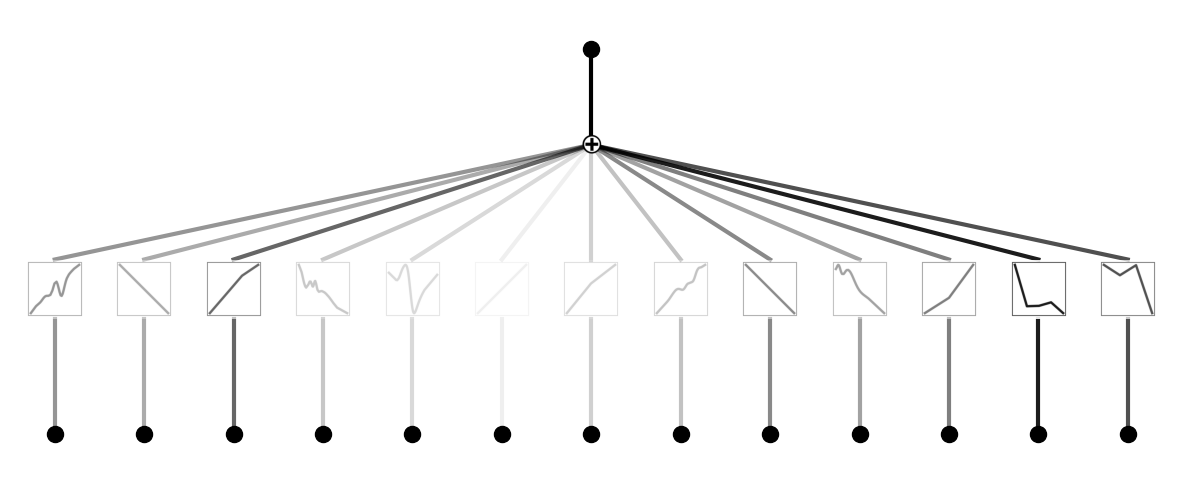

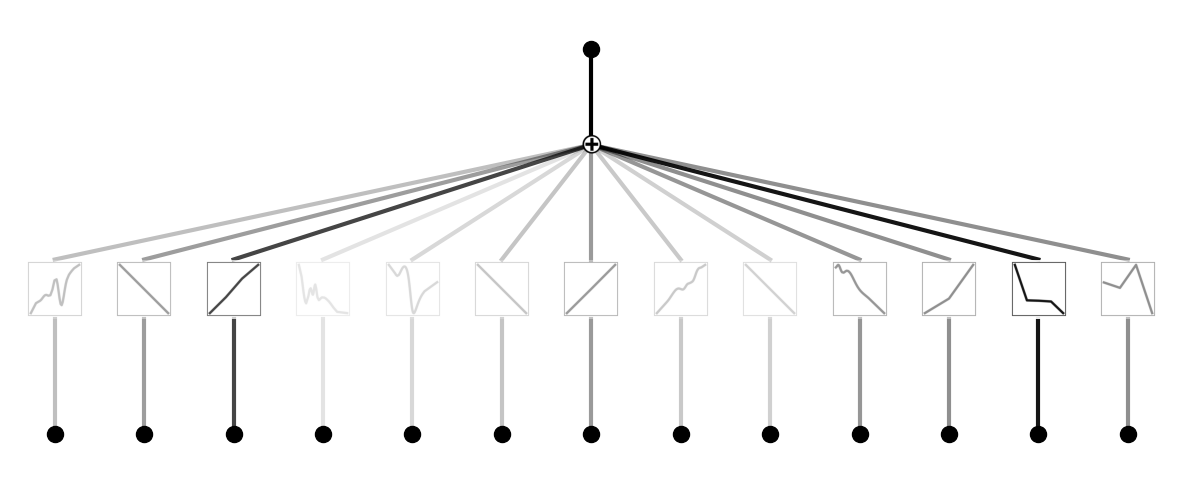

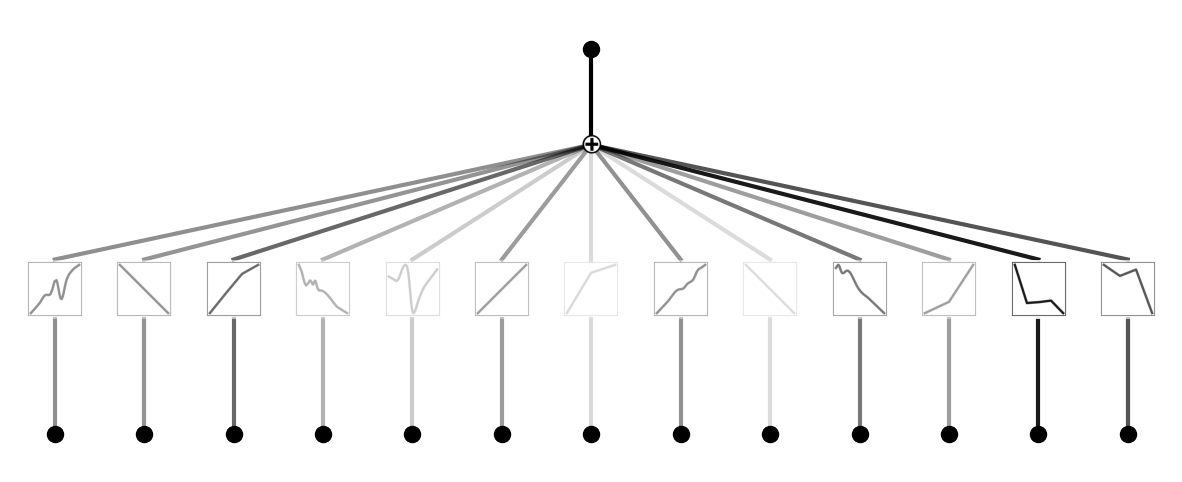

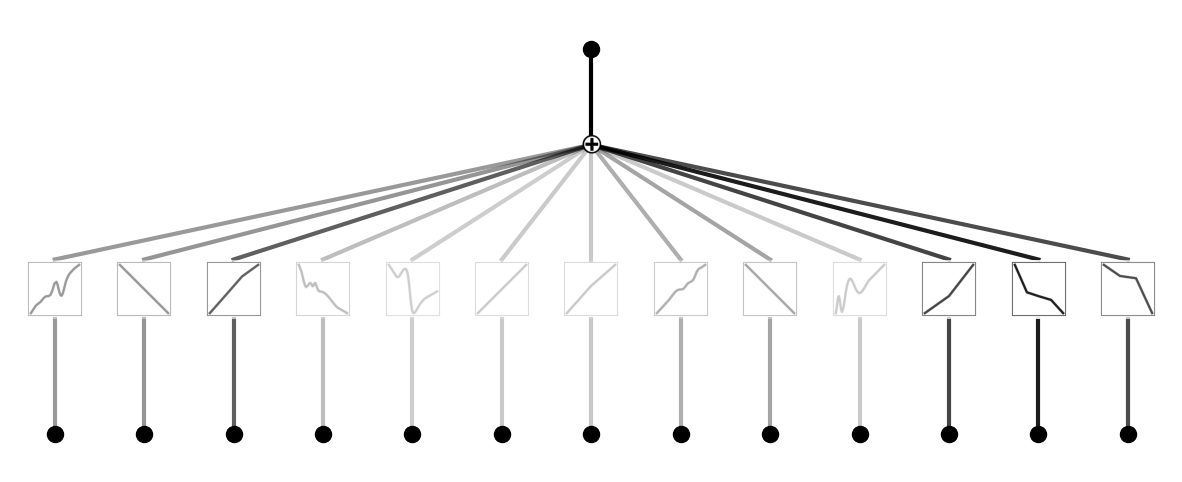

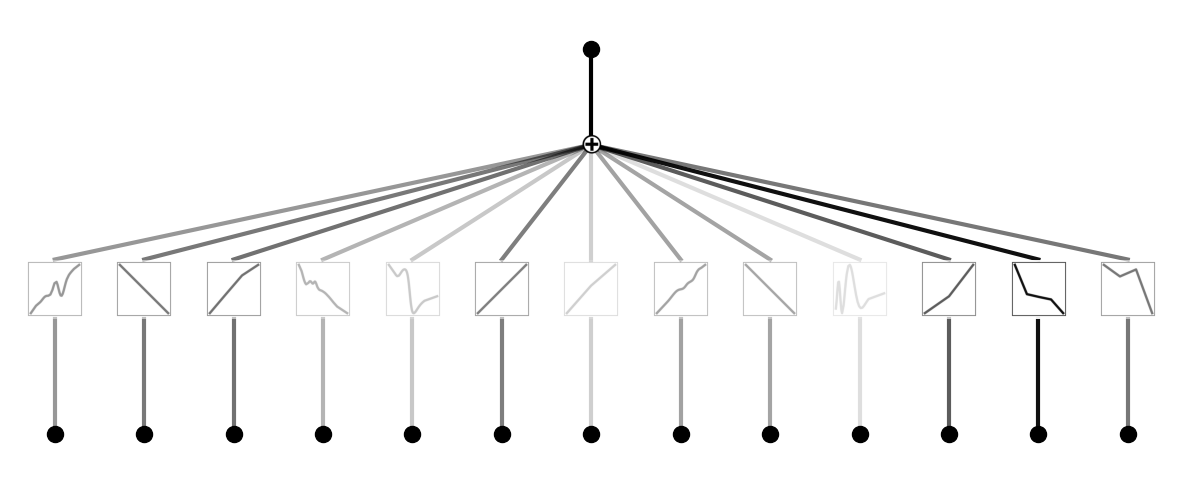

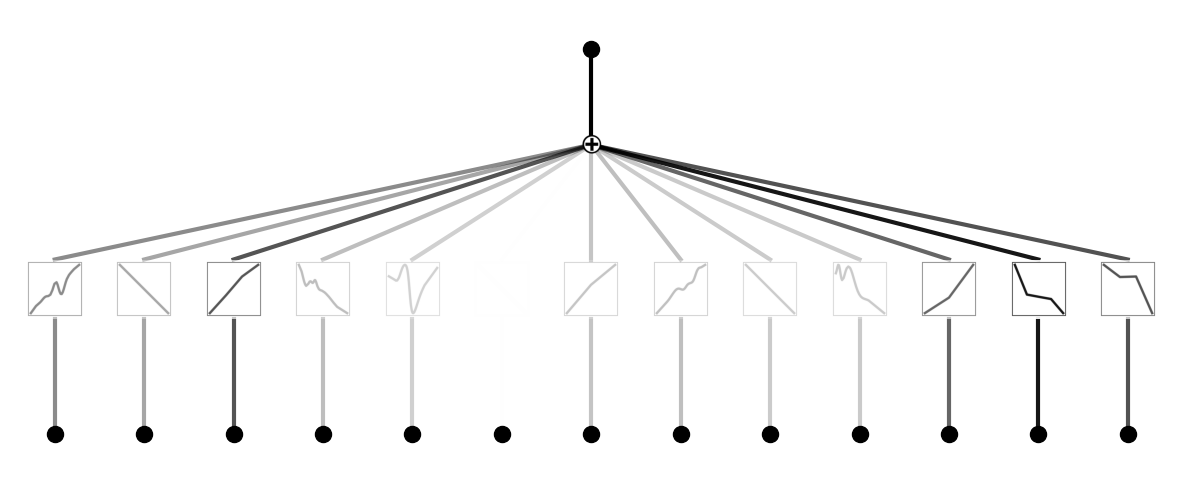

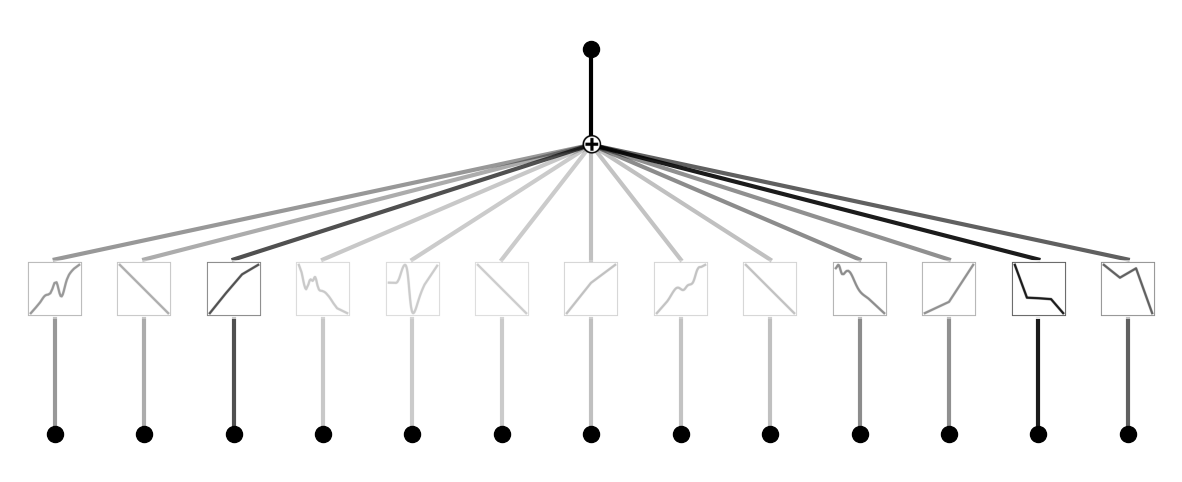

In [24]:
train_accuracy = [0] 
test_accuracy  = [0] 

train_losses = [] 
test_losses = [] 
for i in range(1 , 30) :
    model = KAN(width=[13 , 1 ],grid = 30 , k = i , device= device) 

    def train_acc():
        return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).type(dtype))

    def test_acc():
        return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).type(dtype))
    

    results = model.fit(dataset, opt="LBFGS", steps= 50 , metrics=(train_acc, test_acc) );  
   
    train_accuracy.append( results["train_acc"][-1] )  
    test_accuracy.append( results['test_acc'][-1] )       
                     
    train_losses += results['train_loss']                     
    test_losses += results['test_loss']    
    
    model.plot(scale = 1.5) 
    
       
    #results['train_acc'][-1], results['test_acc'][-1] 

(1.0, 30.0)

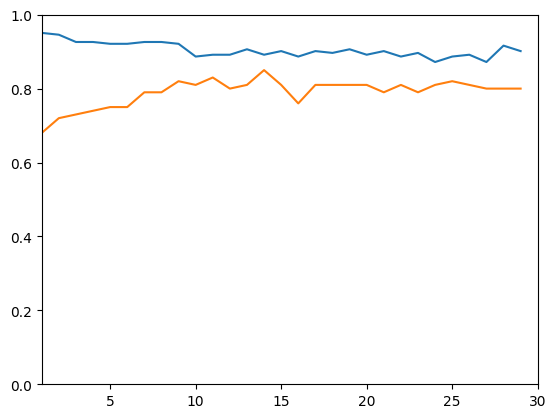

In [25]:
plt.plot(train_accuracy) 
plt.plot(test_accuracy)
plt.ylim(0 , 1)
plt.xlim(1,30)

### Plotting accuracy graphs with respect to k for kan[13 , 1] of grid = 3 

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.05e-01 | test_loss: 3.92e-01 | reg: 5.02e+00 | : 100%|█| 50/50 [00:03<00:00, 14.15it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.11e-01 | test_loss: 3.91e-01 | reg: 4.97e+00 | : 100%|█| 50/50 [00:05<00:00,  9.22it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.10e-01 | test_loss: 3.73e-01 | reg: 5.05e+00 | : 100%|█| 50/50 [00:05<00:00,  8.73it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.13e-01 | test_loss: 3.74e-01 | reg: 5.27e+00 | : 100%|█| 50/50 [00:06<00:00,  7.89it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.16e-01 | test_loss: 3.69e-01 | reg: 5.02e+00 | : 100%|█| 50/50 [00:06<00:00,  7.42it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.24e-01 | test_loss: 3.83e-01 | reg: 5.26e+00 | : 100%|█| 50/50 [00:07<00:00,  7.05it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.23e-01 | test_loss: 3.81e-01 | reg: 5.08e+00 | : 100%|█| 50/50 [00:07<00:00,  6.89it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.26e-01 | test_loss: 3.62e-01 | reg: 4.93e+00 | : 100%|█| 50/50 [00:07<00:00,  6.85it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.26e-01 | test_loss: 3.74e-01 | reg: 4.97e+00 | : 100%|█| 50/50 [00:07<00:00,  6.39it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.34e-01 | test_loss: 3.86e-01 | reg: 5.08e+00 | : 100%|█| 50/50 [00:10<00:00,  4.67it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.38e-01 | test_loss: 3.78e-01 | reg: 5.33e+00 | : 100%|█| 50/50 [00:10<00:00,  4.98it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.33e-01 | test_loss: 3.88e-01 | reg: 5.17e+00 | : 100%|█| 50/50 [00:12<00:00,  3.87it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.23e-01 | test_loss: 3.71e-01 | reg: 5.41e+00 | : 100%|█| 50/50 [00:28<00:00,  1.73it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.37e-01 | test_loss: 3.97e-01 | reg: 5.19e+00 | : 100%|█| 50/50 [00:14<00:00,  3.49it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.39e-01 | test_loss: 4.01e-01 | reg: 5.20e+00 | : 100%|█| 50/50 [00:12<00:00,  4.04it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.39e-01 | test_loss: 3.89e-01 | reg: 5.30e+00 | : 100%|█| 50/50 [00:13<00:00,  3.60it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.39e-01 | test_loss: 4.05e-01 | reg: 5.08e+00 | : 100%|█| 50/50 [00:15<00:00,  3.30it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.32e-01 | test_loss: 3.81e-01 | reg: 5.53e+00 | : 100%|█| 50/50 [00:16<00:00,  3.05it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.34e-01 | test_loss: 4.04e-01 | reg: 5.13e+00 | : 100%|█| 50/50 [00:17<00:00,  2.91it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.34e-01 | test_loss: 4.16e-01 | reg: 5.36e+00 | : 100%|█| 50/50 [00:14<00:00,  3.42it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.36e-01 | test_loss: 3.95e-01 | reg: 5.04e+00 | : 100%|█| 50/50 [00:13<00:00,  3.60it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.37e-01 | test_loss: 4.04e-01 | reg: 5.48e+00 | : 100%|█| 50/50 [00:14<00:00,  3.46it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.38e-01 | test_loss: 4.11e-01 | reg: 5.17e+00 | : 100%|█| 50/50 [00:16<00:00,  3.08it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.38e-01 | test_loss: 4.06e-01 | reg: 5.28e+00 | : 100%|█| 50/50 [00:19<00:00,  2.63it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.34e-01 | test_loss: 3.93e-01 | reg: 4.91e+00 | : 100%|█| 50/50 [00:16<00:00,  3.04it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.36e-01 | test_loss: 4.04e-01 | reg: 5.13e+00 | : 100%|█| 50/50 [00:16<00:00,  3.08it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.36e-01 | test_loss: 4.11e-01 | reg: 4.95e+00 | : 100%|█| 50/50 [00:20<00:00,  2.48it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.36e-01 | test_loss: 3.96e-01 | reg: 5.12e+00 | : 100%|█| 50/50 [00:27<00:00,  1.83it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.35e-01 | test_loss: 4.00e-01 | reg: 5.20e+00 | : 100%|█| 50/50 [00:24<00:00,  2.03it


saving model version 0.1


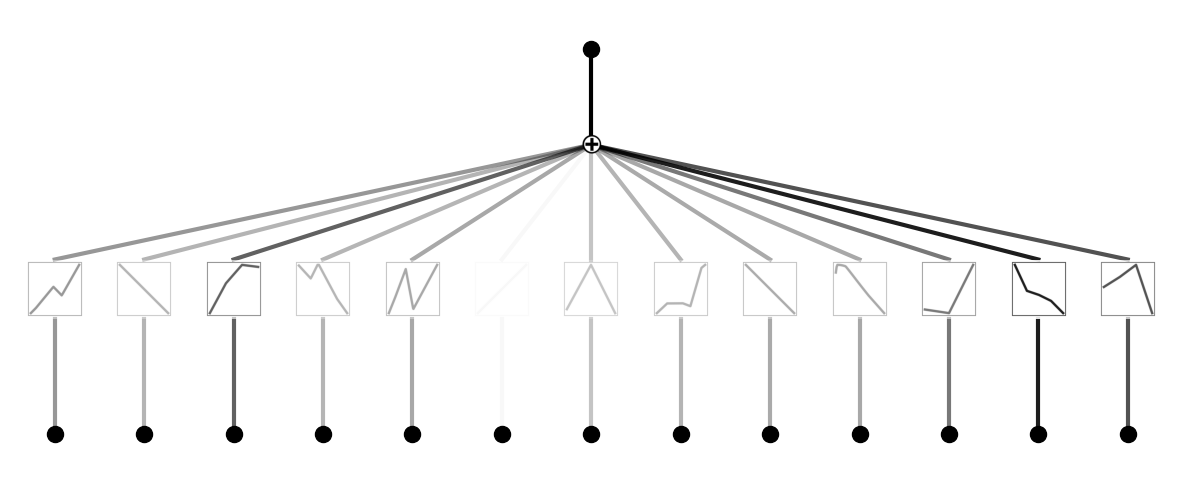

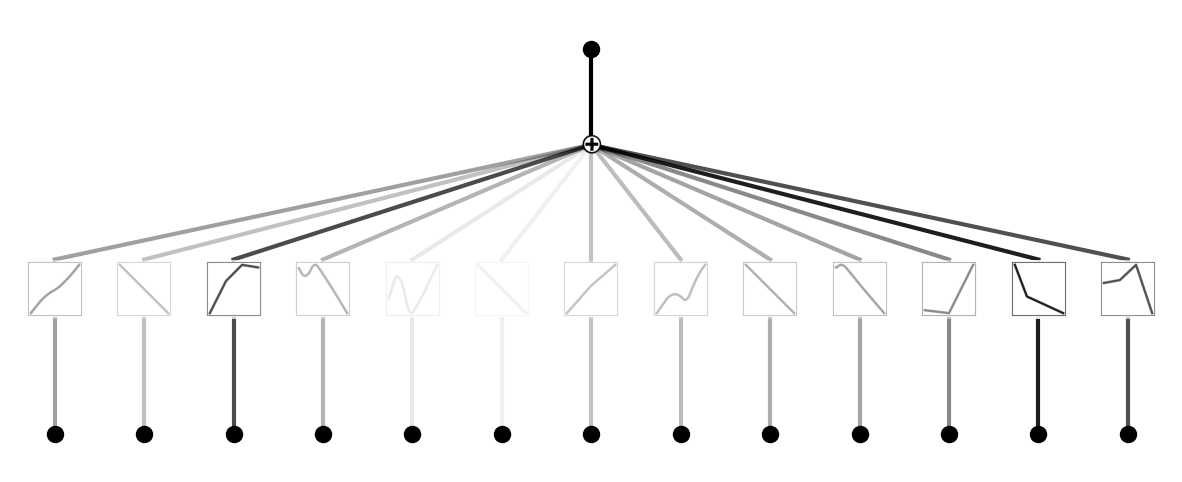

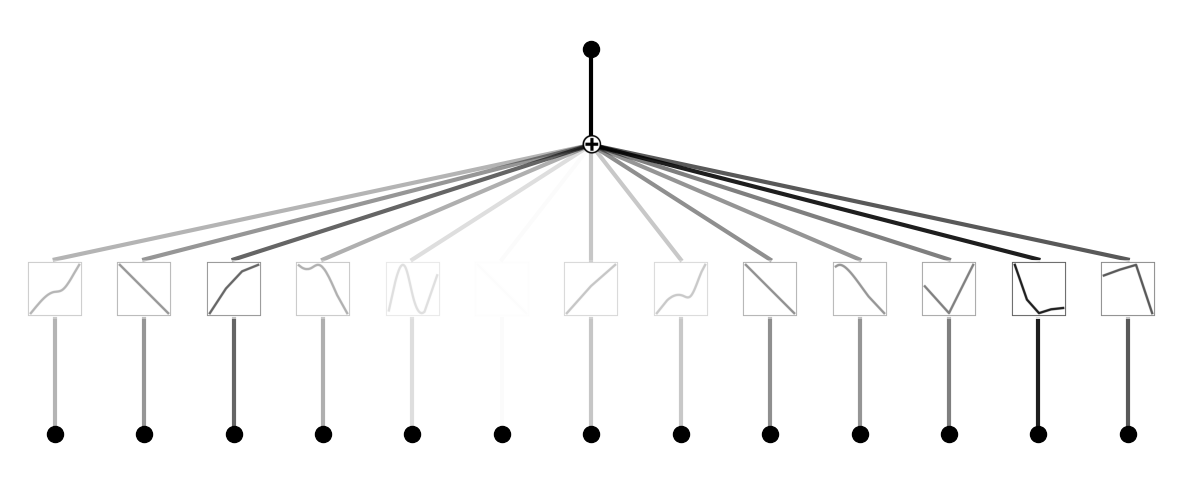

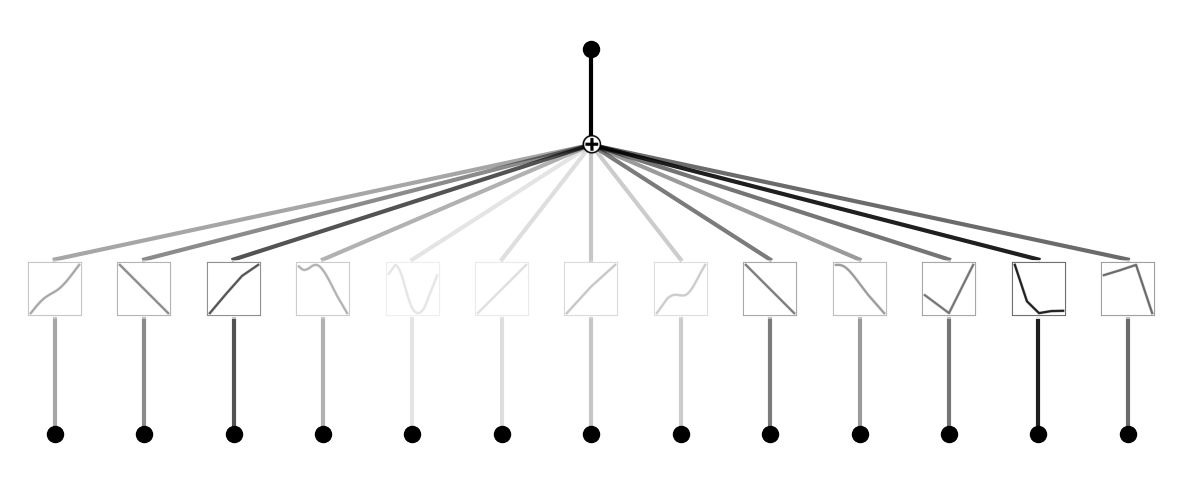

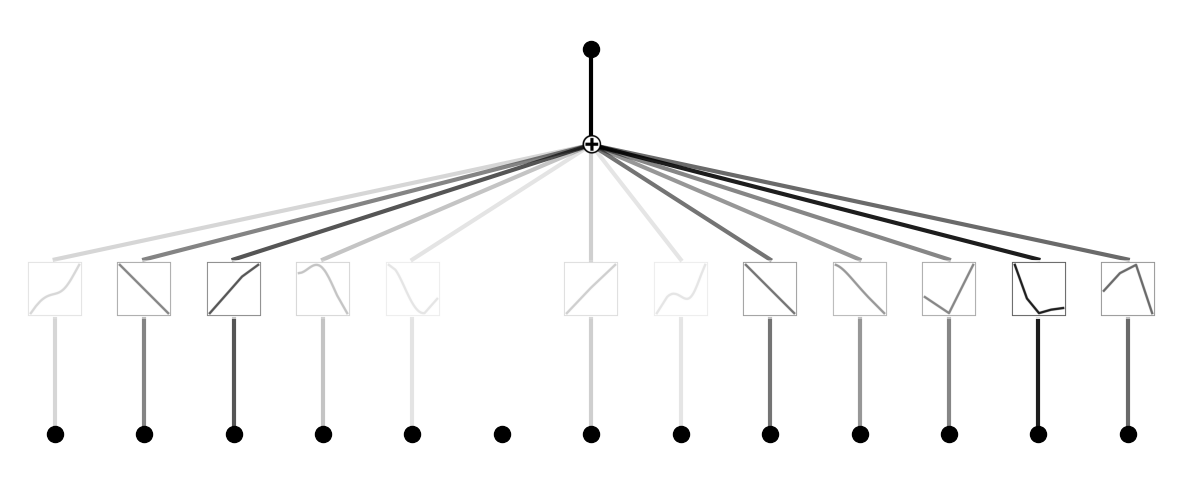

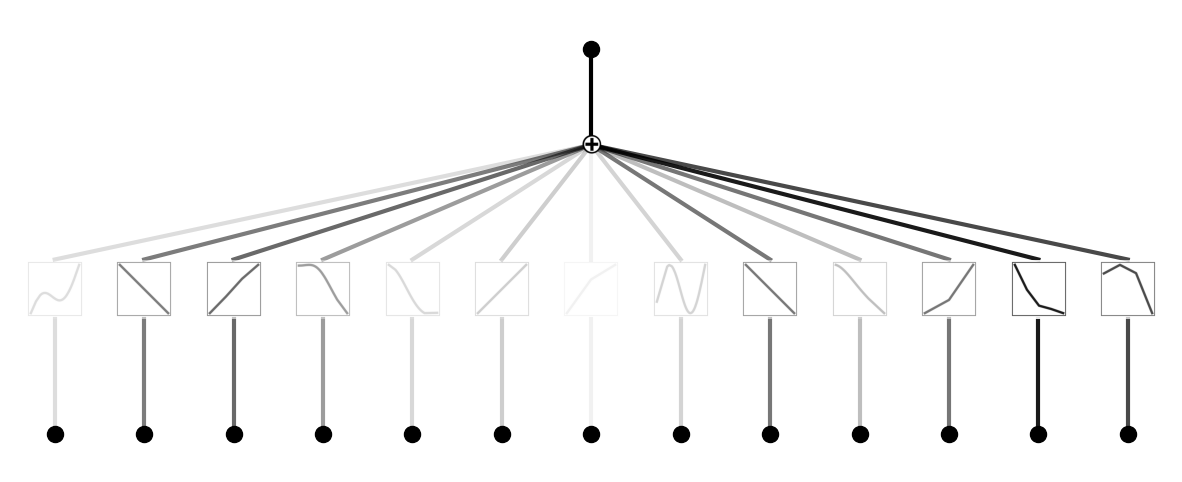

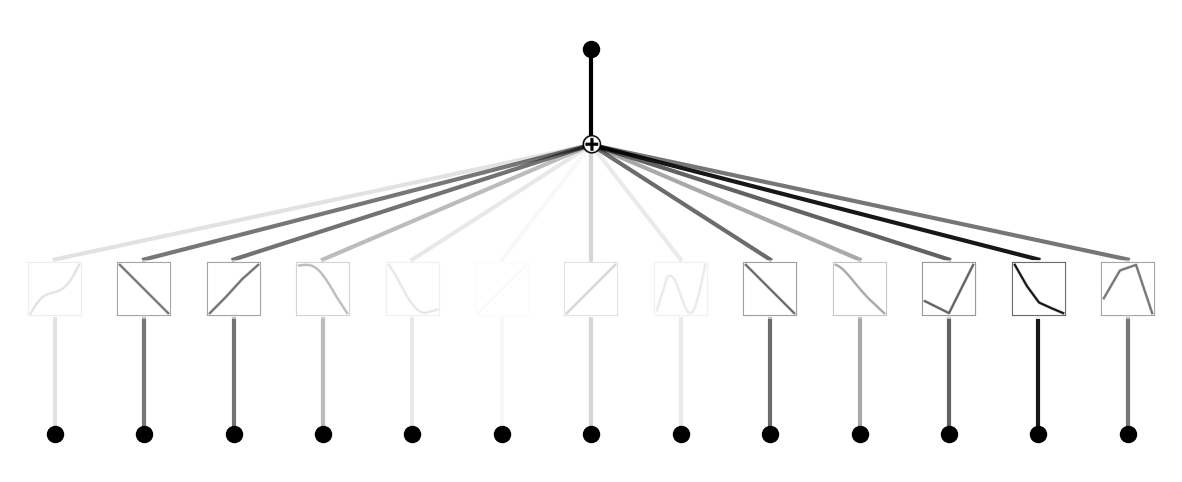

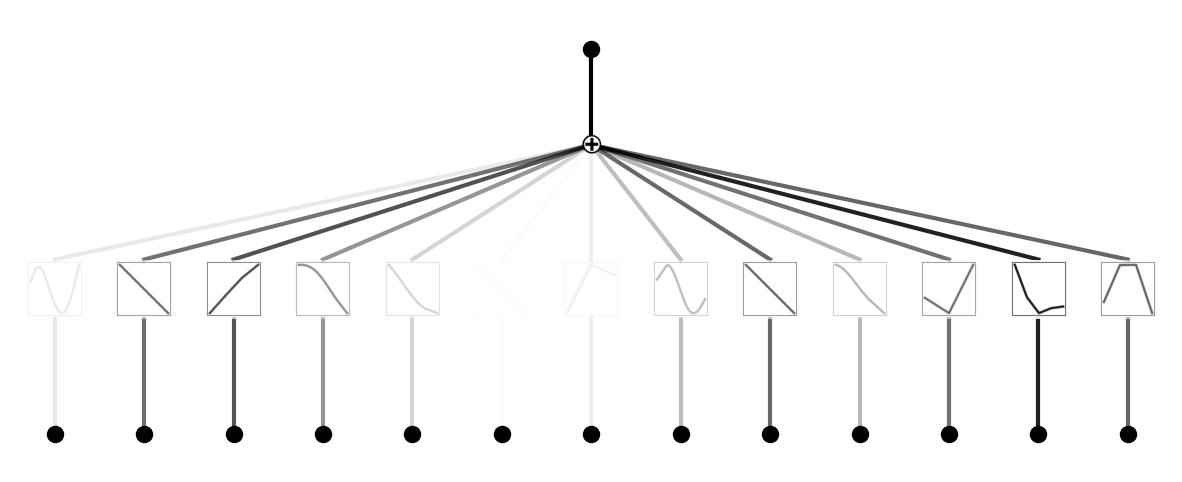

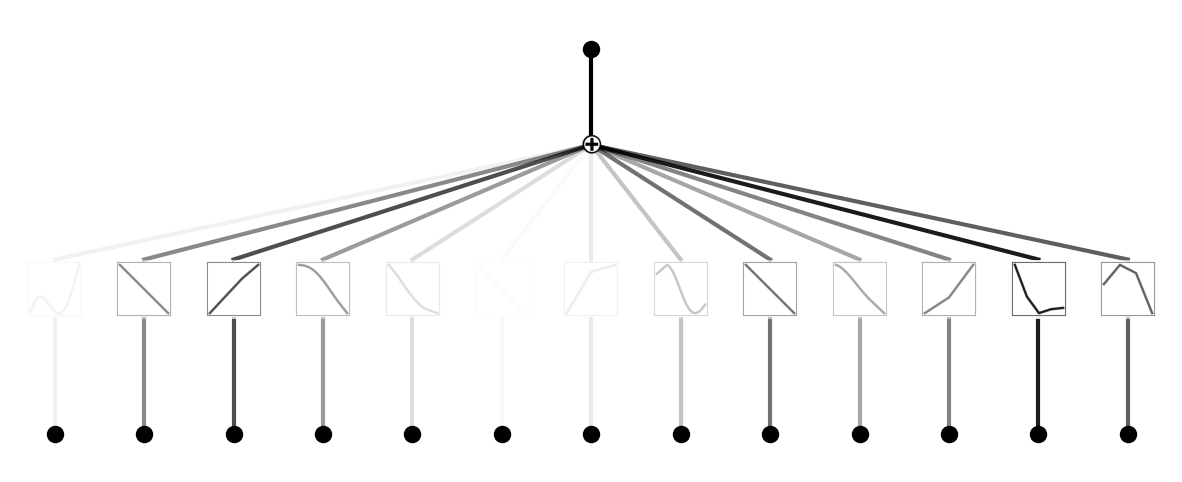

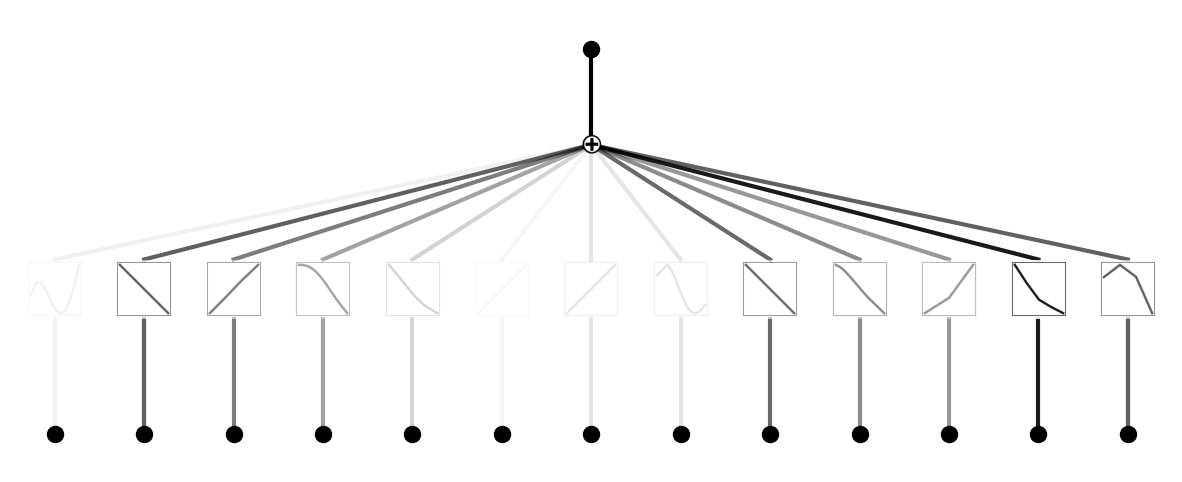

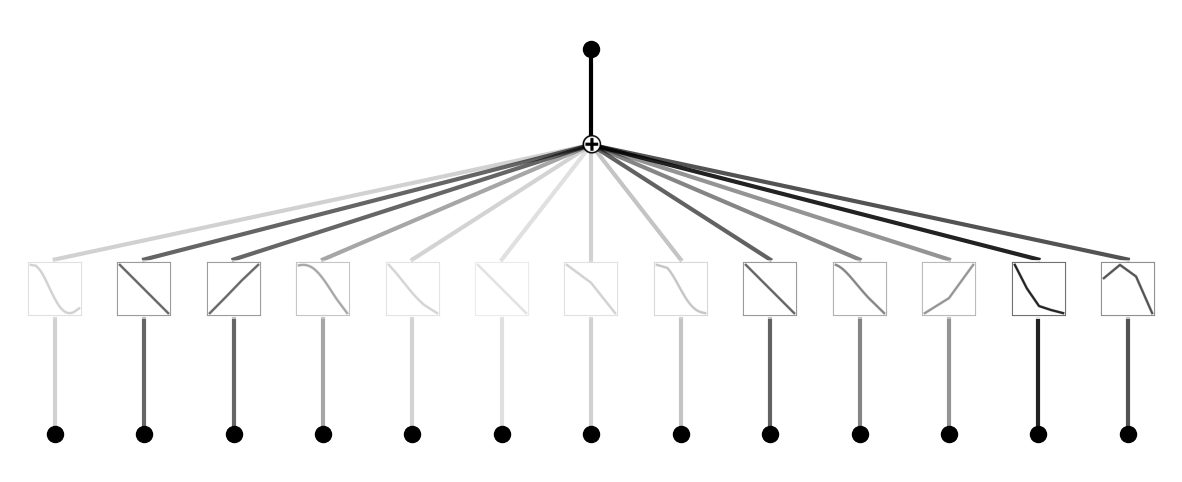

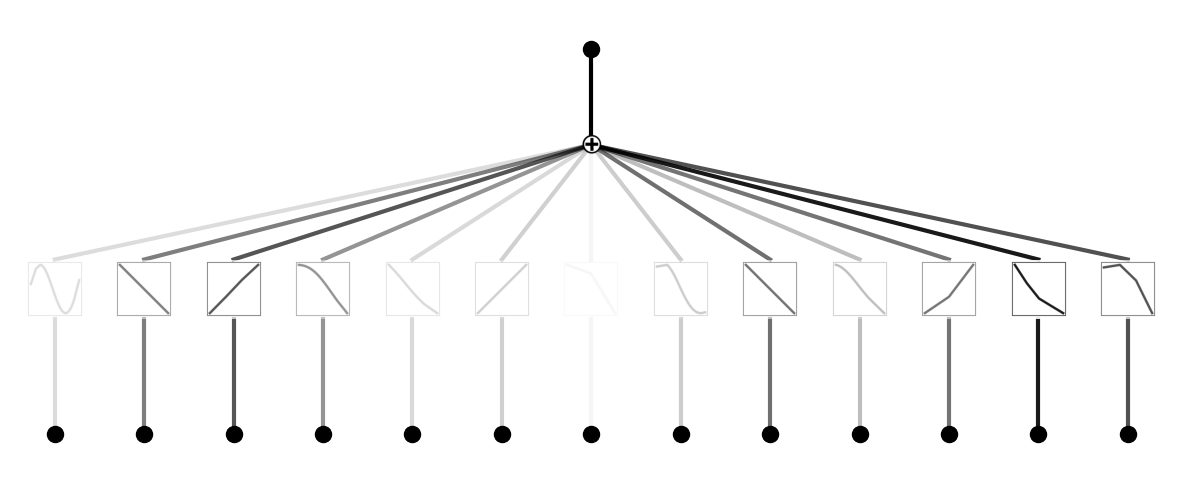

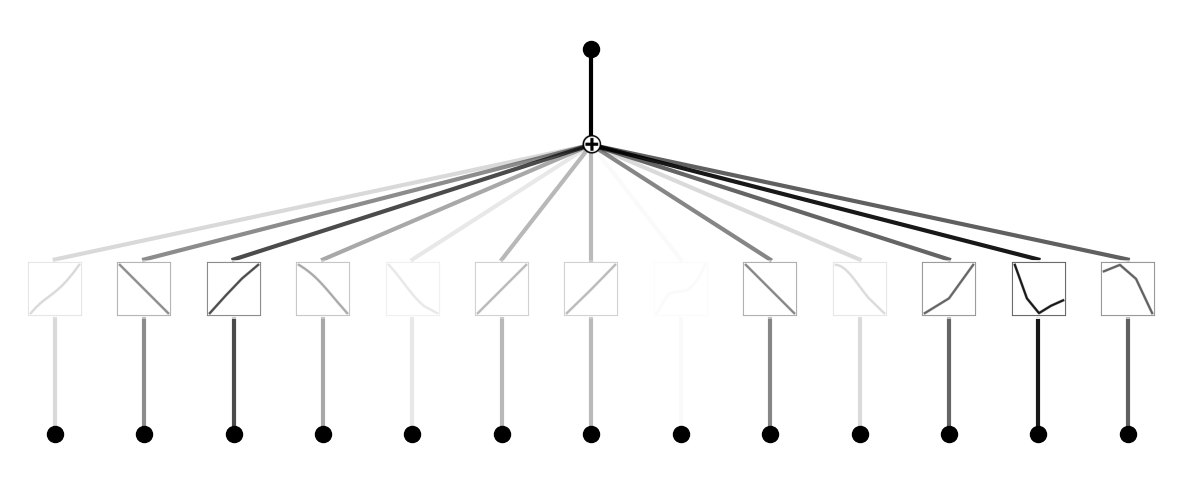

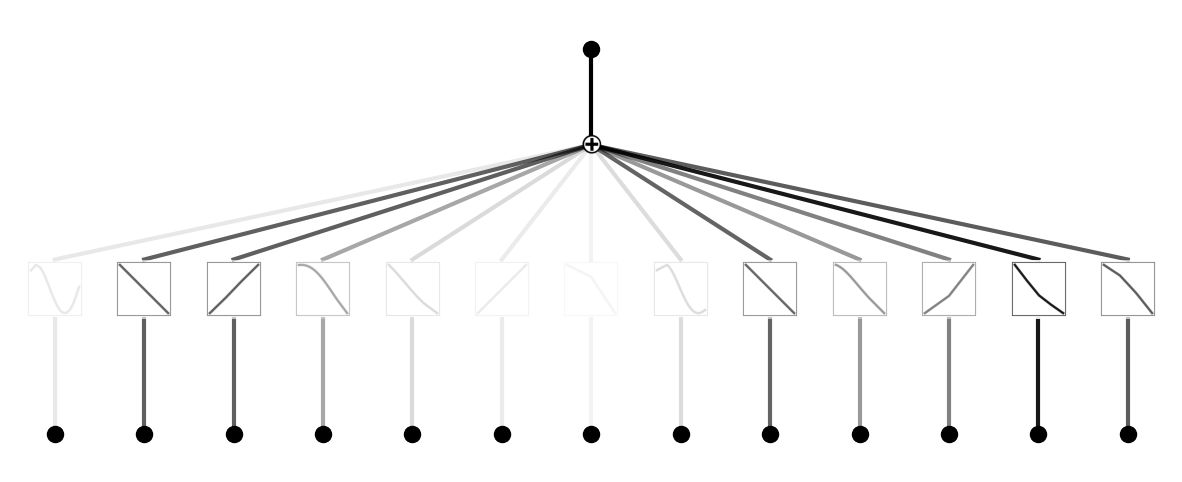

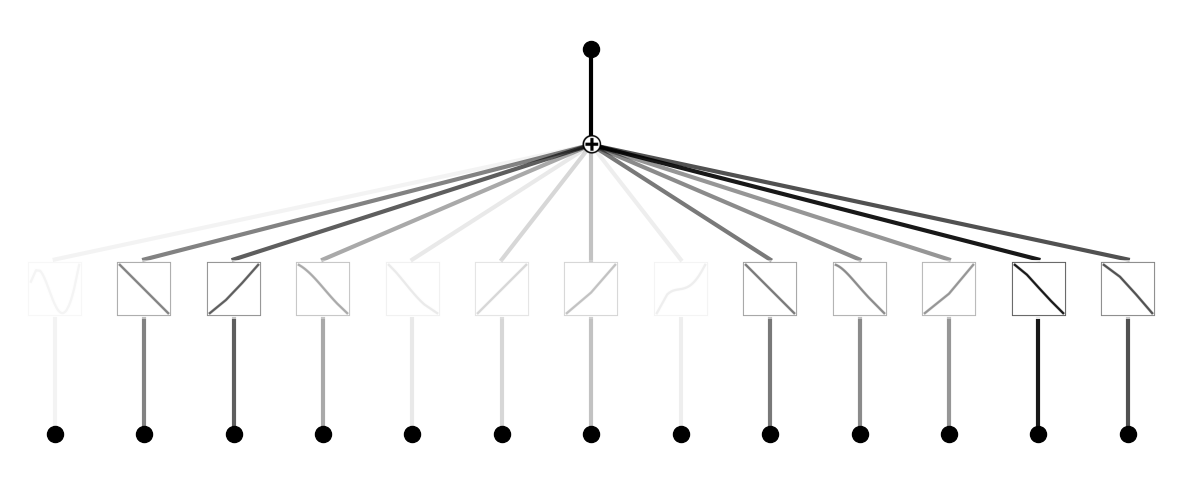

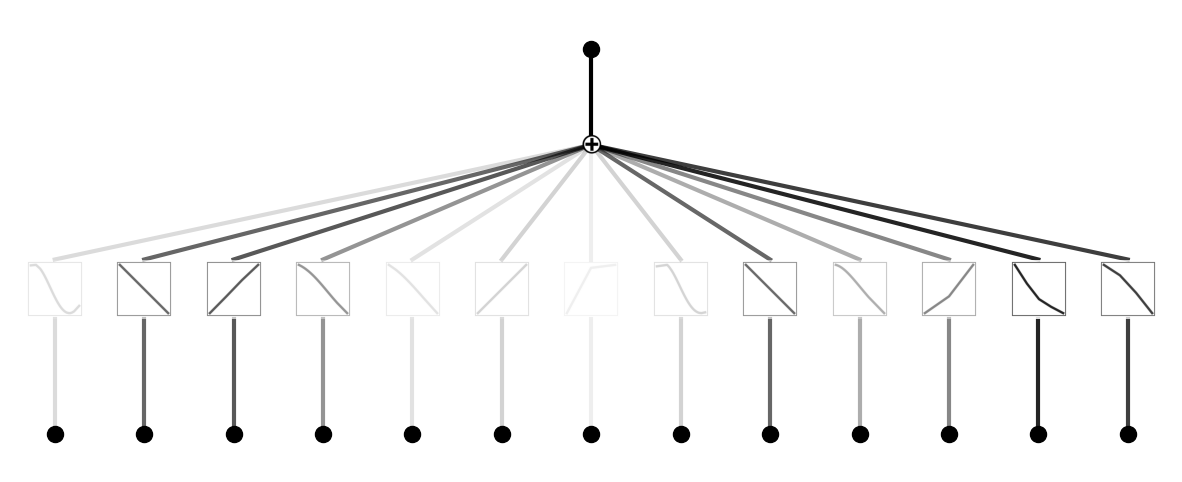

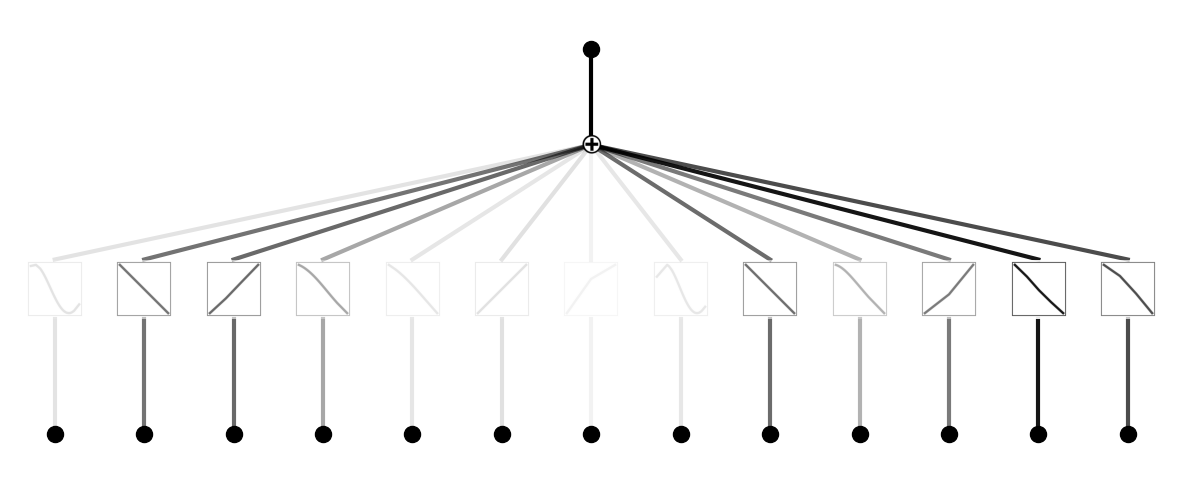

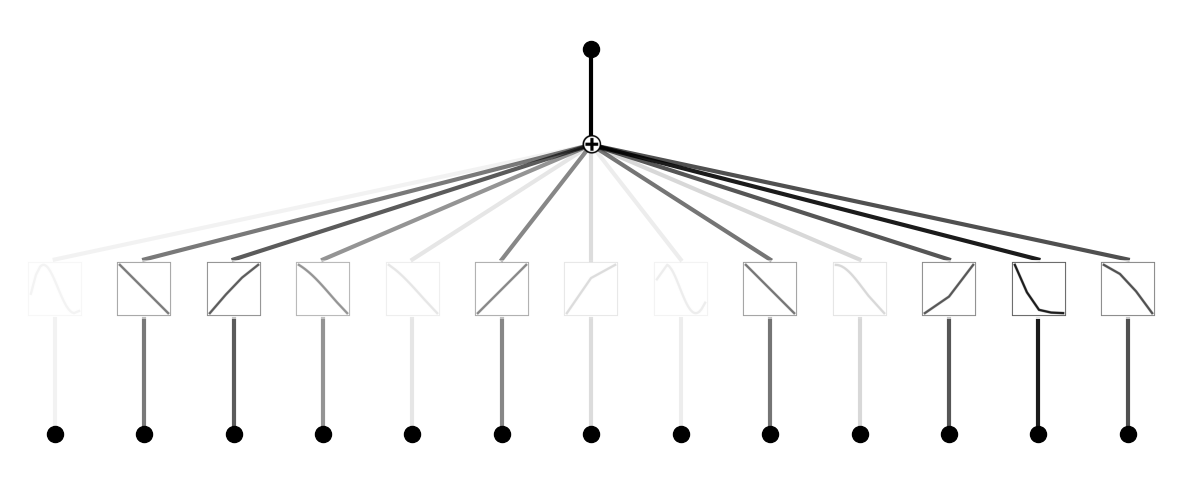

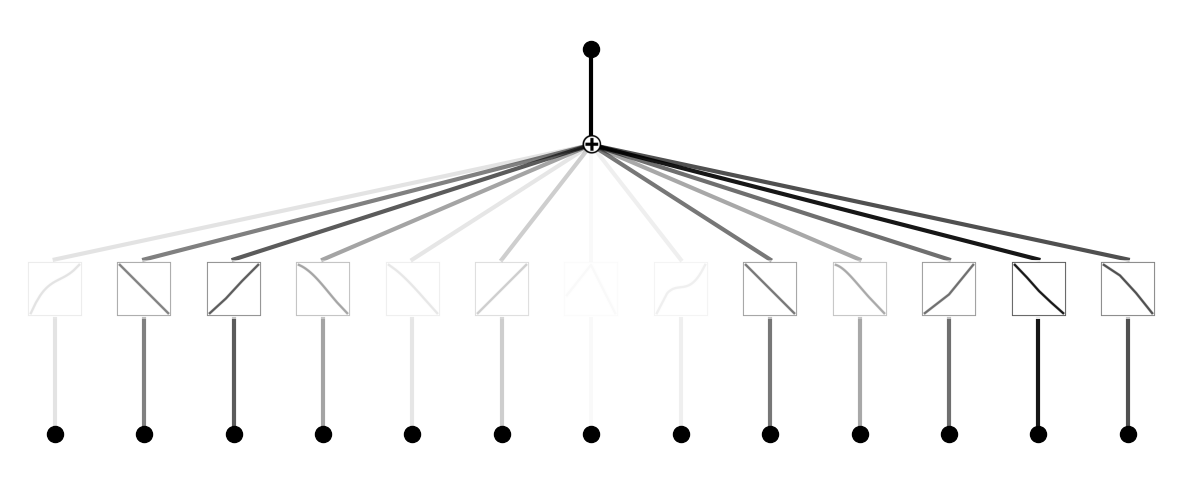

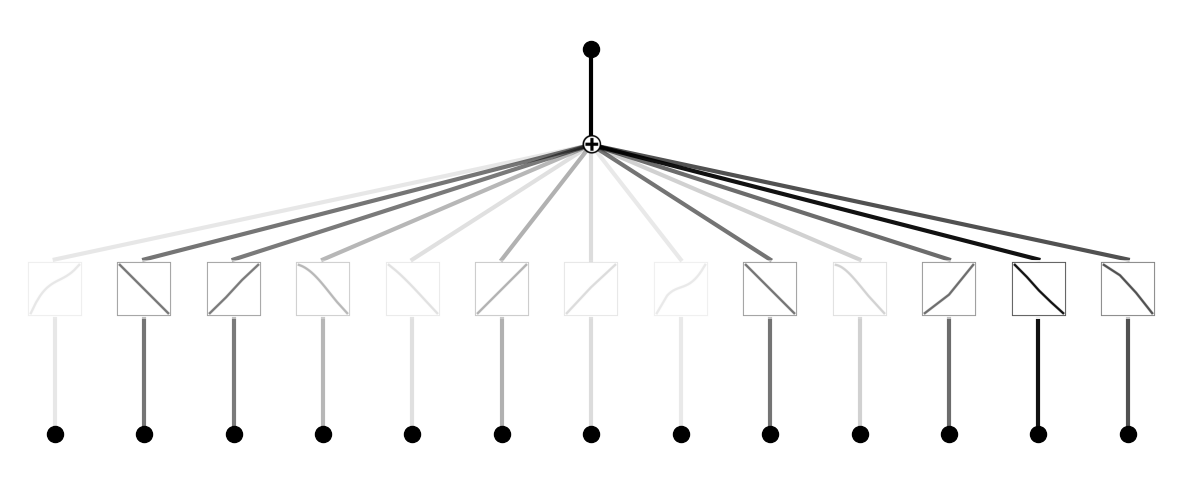

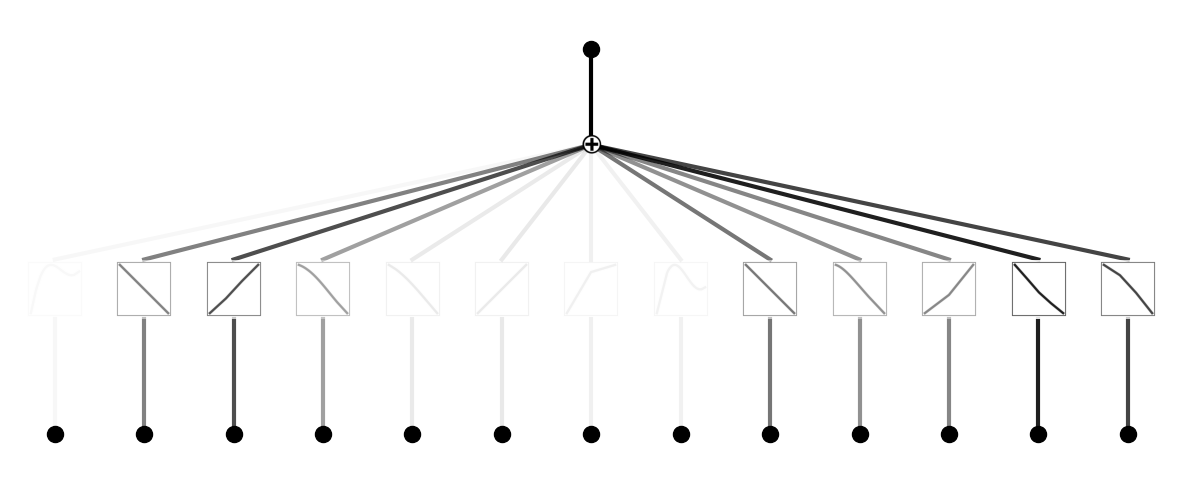

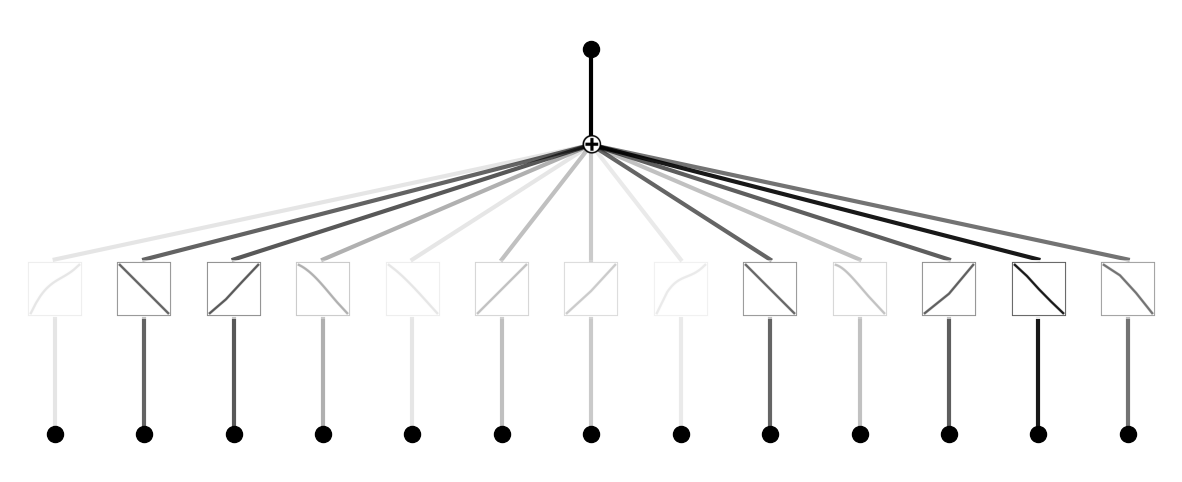

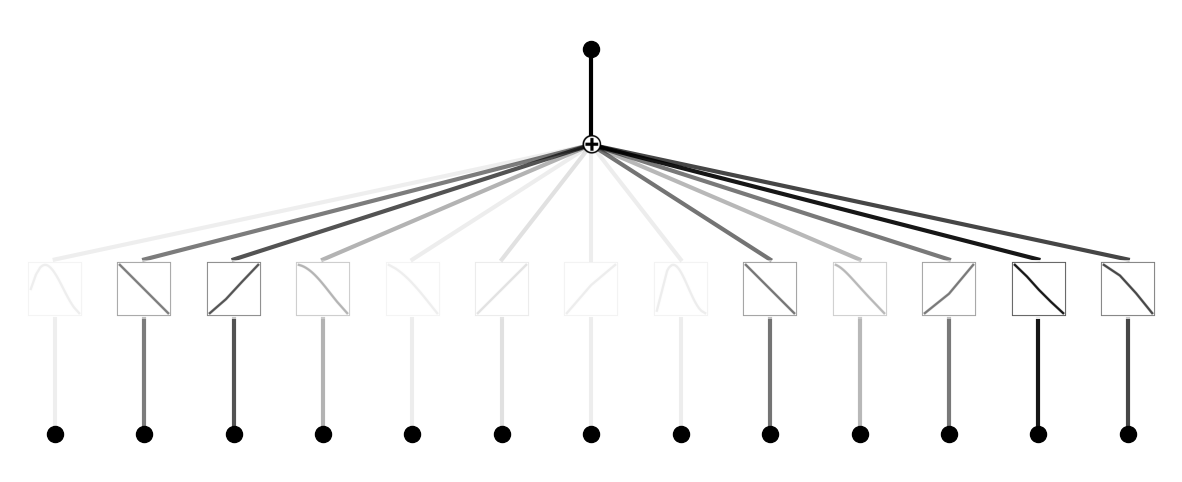

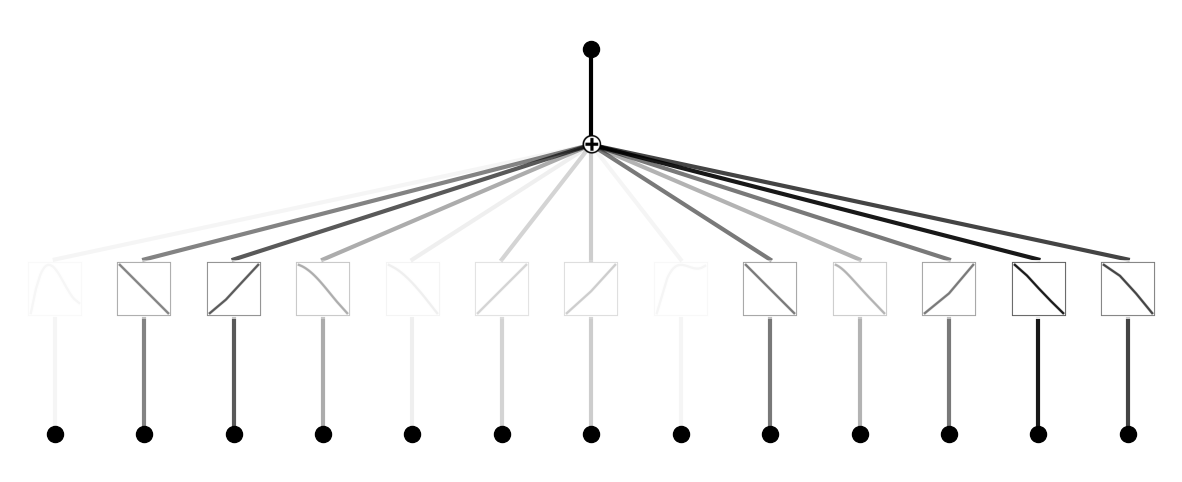

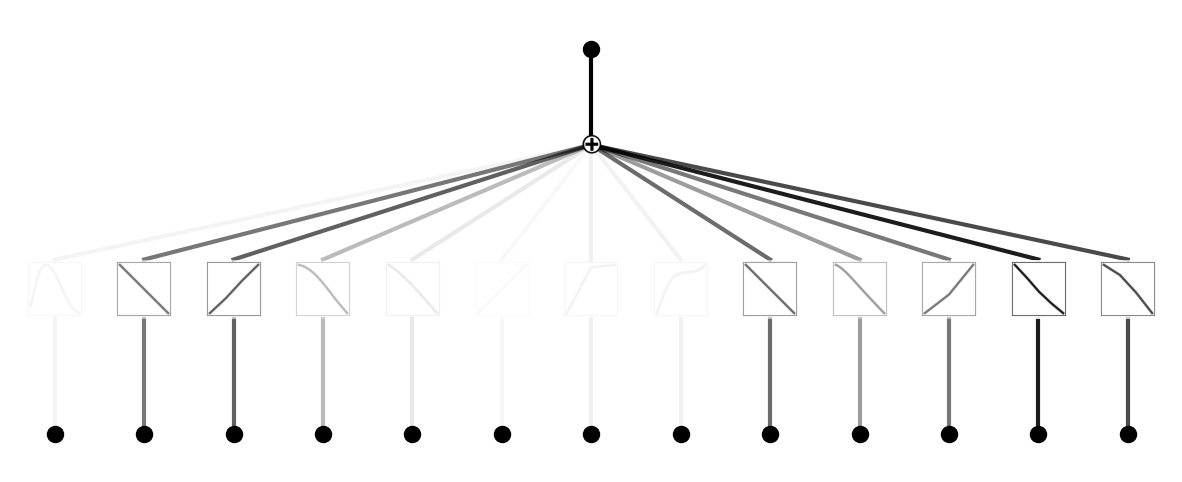

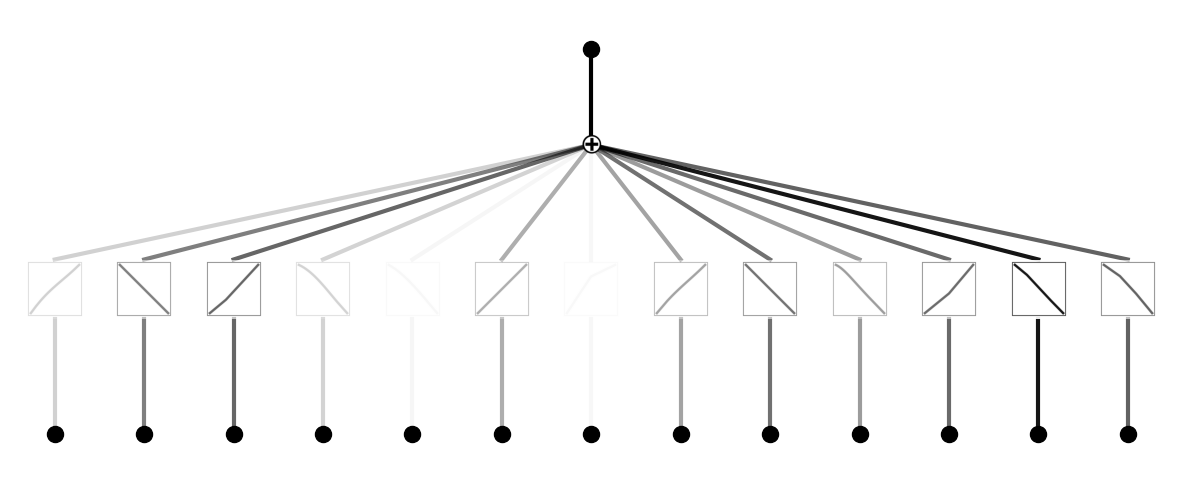

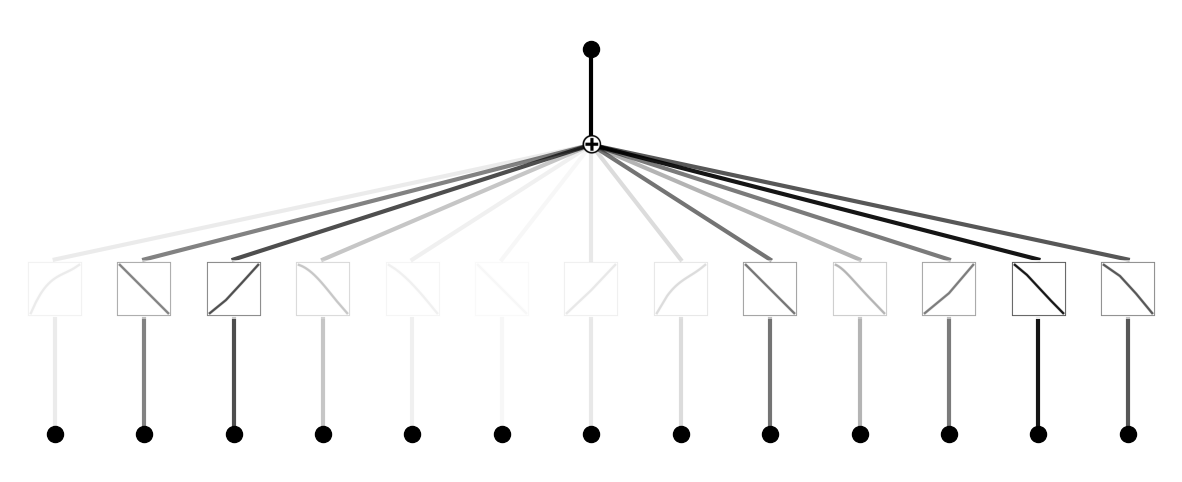

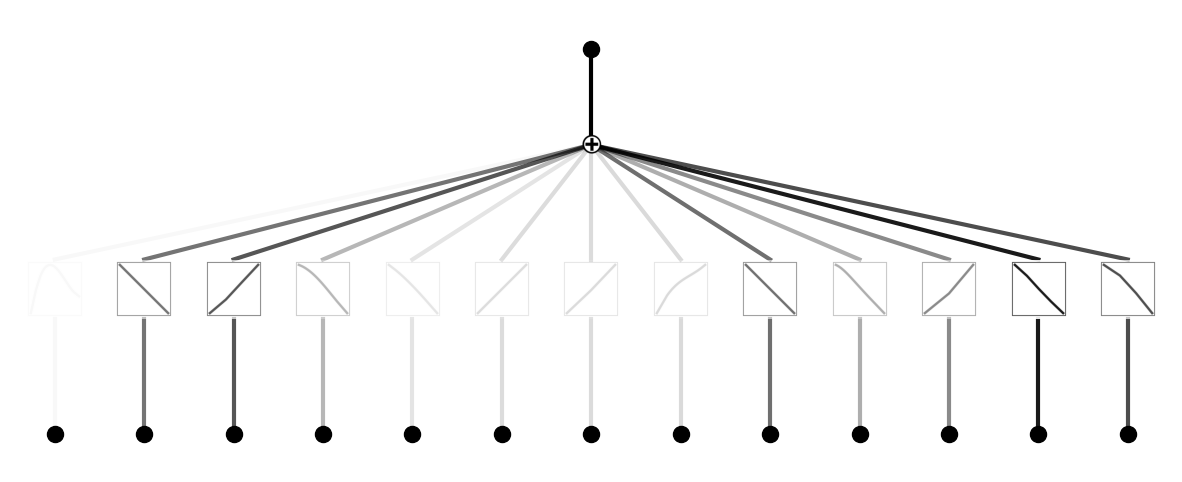

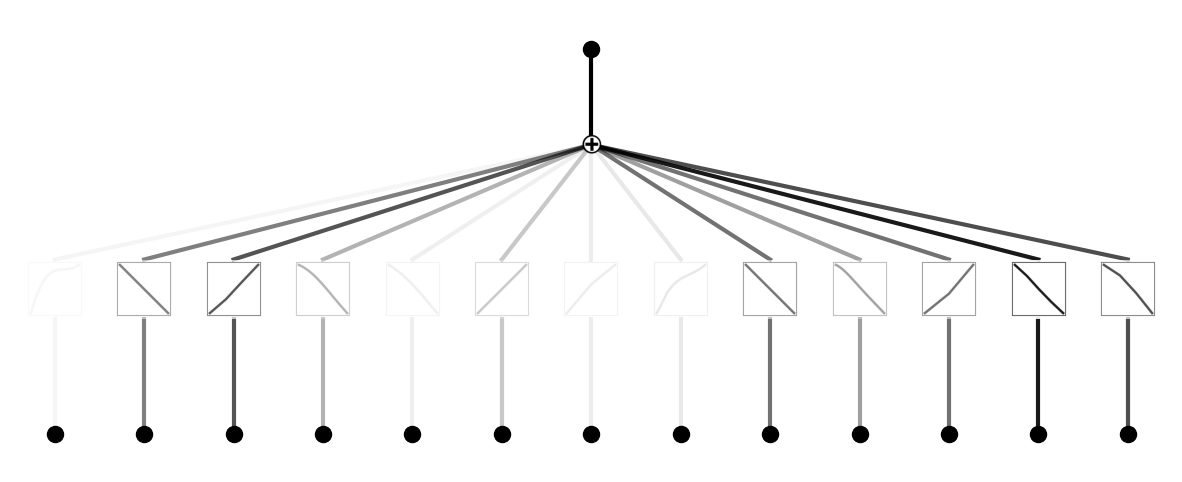

In [26]:
train_accuracy = [0] 
test_accuracy  = [0] 

train_losses = [] 
test_losses = [] 
for i in range(1 , 30) :
    model = KAN(width=[13 , 1 ],grid = 3 , k = i , device= device) 

    def train_acc():
        return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).type(dtype))

    def test_acc():
        return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).type(dtype))
    

    results = model.fit(dataset, opt="LBFGS", steps= 50 , metrics=(train_acc, test_acc) );  
   
    train_accuracy.append( results["train_acc"][-1] )  
    test_accuracy.append( results['test_acc'][-1] )       
    
    train_losses += results['train_loss']                         
    test_losses += results['test_loss']  
    
    model.plot(scale = 1.5)   
    
    

       
    #results['train_acc'][-1], results['test_acc'][-1] 

(1.0, 30.0)

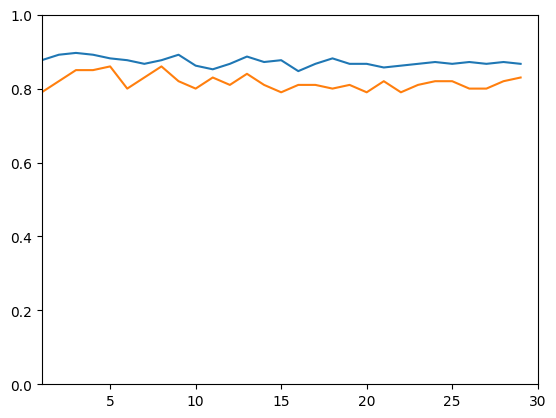

In [28]:
plt.plot(train_accuracy) 
plt.plot(test_accuracy)           
plt.ylim(0,1) 
plt.xlim(1,30)
